# **Lab 2 For Data Analytics :- ⚡ ✨**

***Represented by*** :- *Ahmed Elsayed Salama ( **6** ) 💛*  

# **Problem Formulation :-**

# **1 - What is the input?**
-> **277803** rows × **21** columns

There are 8 files with .csv format

The **File** Contains ( **21 Features** ) including  SALE PRICE for Prediction

---------------------------------------------

# **2 - What is the output?**

-> **Predict** The Inputs Features to Y-Label **SALE PRICE**

--------------------------------------------

# **3 - What data mining function is required?**

-> **clean** our input data to get the desired knowledge .

-> **Data mining** generally refers to examining a large amount of data to extract valuable information. The data mining process uses predictive models based on existing and historical data to project potential outcome for business activities and transactions.

--------------------------------------------------

# **4 - What could be the challenges?**

1 - **Decribe** the dataset .

2- **Check** the Quality of dataSet .

3- **Handling** the Missing values .

4- **Handling** the Outliers and Noise . 

5- **Apply** feature Engineering methods .

6- **Apply** hypothesis test as second time to me .

7- **Apply** Auto ml for the first time to me .

8- **Apply** Select features mechanism

-----------------------------------------

# **5 - What is the impact?**
 -> So ,  predict The Inputs Features to Y-Label **SALE PRICE**


# **File Contents :-**
The file Contains the answer of the **5 Tasks**  

# **References**

1 - https://www.section.io/engineering-education/statistical-hypothesis-testing-python-implementation/

2 - https://stackoverflow.com/questions/49735683/python-removing-rows-on-count-condition

3 - https://www.geeksforgeeks.org/graph-plotting-in-python-set-1/

4- https://stackoverflow.com/questions/38892385/scypy-wilcoxon-test-compare-distribution-with-a-single-value

5- https://stackoverflow.com/questions/65436659/why-is-pandas-str-replace-returning-nan

6- https://www.analyticsvidhya.com/blog/2021/10/how-to-deal-with-missing-data-using-python/

# EDA, Feature Engineering, and AutoML

In this lab, we will apply learned concepts from Day 3-4 lectures to perform data exploration, feature engineering, and autoML on a house sale dataset.

The goal of this assignment is to analyze 3 years’(2018-2020) house sales data provided by New York City (NYC) goverment and build regression model to predict house price. NYC has five boroughs, i.e., Bronx, Brooklyn, Manhattan, Queens and Staten Island. Sales of houses in each borough has been provided.


**Submission: submit via onq.** 


# **Required Installation For Auto-Ml**

In [144]:
!sudo apt-get install build-essential swig
!curl https://raw.githubusercontent.com/automl/auto-sklearn/master/requirements.txt | xargs -n 1 -L 1 pip install
!pip install auto-sklearn

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
swig is already the newest version (3.0.12-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   250  100   250    0     0   1436      0 --:--:-- --:--:-- --:--:--  1436


# **Required For bootstrap**

In [236]:
!pip install scikits.bootstrap

# **Import Libraries**

In [237]:
# Import needed libraries. E.g., pandas, missingno, and sklearn
import pandas as pd
import missingno as msno
from collections import Counter
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from numpy import isnan
import pylab
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from zipfile import ZipFile
from google.colab import files
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression ,SGDRegressor
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import sklearn.metrics
from pprint import pprint
from sklearn.preprocessing import StandardScaler
import autosklearn.regression
import scikits.bootstrap as bootstrap


**Task 1**: Read dataset, merge data, and  perform basic data exploration. Note, you should briefely discuss the quality of dataset (missing values, duplicate entries, etc.) Also, in task 3, you would be asked to perform prediction on house sale price, thus it would be good to consider outliers related to this prediciton task when you perform data cleaning.

In [146]:
# TODO write code to perform task 1
!pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
!kaggle datasets download -d ahmedsalamas/lab2dataset

mkdir: cannot create directory ‘/root/.kaggle’: File exists
lab2dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [147]:
zip = ZipFile('/content/lab2dataset.zip')
zip.extractall()
zip.close()


# **Read and Merge All Csv Files**

In [148]:
file1=pd.read_csv("/content/lab2-dataset/2018_bronx.csv")
file2=pd.read_csv("/content/lab2-dataset/2018_brooklyn.csv")
file3=pd.read_csv("/content/lab2-dataset/2018_manhattan.csv")
file4=pd.read_csv("/content/lab2-dataset/2018_queens.csv")
file5=pd.read_csv("/content/lab2-dataset/2018_statenisland.csv")
#
file6=pd.read_csv("/content/lab2-dataset/2019_bronx.csv")
file7=pd.read_csv("/content/lab2-dataset/2019_brooklyn.csv")
file8=pd.read_csv("/content/lab2-dataset/2019_manhattan.csv")
file9=pd.read_csv("/content/lab2-dataset/2019_queens.csv")
file10=pd.read_csv("/content/lab2-dataset/2019_statenisland.csv")
#
file11=pd.read_csv("/content/lab2-dataset/2020_bronx.csv")
file12=pd.read_csv("/content/lab2-dataset/2020_brooklyn.csv")
file13=pd.read_csv("/content/lab2-dataset/2020_manhattan.csv")
file14=pd.read_csv("/content/lab2-dataset/2020_queens.csv")
file15=pd.read_csv("/content/lab2-dataset/2020_statenisland.csv")
##
list_of_files=[file1,file2,file3,file4,file5,file6,file7,file8,file9,file10,file11,file12,file13,file14,file15]
merged_dataSet = pd.concat(list_of_files,ignore_index=True)

In [149]:
merged_dataSet

BOROUGH NEIGHBORHOOD  BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  \
0           2.0     BATHGATE  01 ONE FAMILY DWELLINGS                    1   
1           2.0     BATHGATE  01 ONE FAMILY DWELLINGS                    1   
2           2.0     BATHGATE  01 ONE FAMILY DWELLINGS                    1   
3           2.0     BATHGATE  01 ONE FAMILY DWELLINGS                    1   
4           2.0     BATHGATE  01 ONE FAMILY DWELLINGS                    1   
...         ...          ...                      ...                  ...   
277798      NaN          NaN                      NaN                  NaN   
277799      NaN          NaN                      NaN                  NaN   
277800      NaN          NaN                      NaN                  NaN   
277801      NaN          NaN                      NaN                  NaN   
277802      NaN          NaN                      NaN                  NaN   

         BLOCK   LOT  EASE-MENT BUILDING CLASS AT PRESENT  \
0       2907.0  24.0        NaN                        A1   
1       3030.0  62.0        NaN                        A1   
2       3030.0  62.0        NaN                        A1   
3       3030.0  70.0        NaN                        A1   
4       3039.0  28.0        NaN                        A1   
...        ...   ...        ...                       ...   
277798     NaN   NaN        NaN                       NaN   
277799     NaN   NaN        NaN                       NaN   
277800     NaN   NaN        NaN                       NaN   
277801     NaN   NaN        NaN                       NaN   
277802     NaN   NaN        NaN                       NaN   

                         ADDRESS APARTMENT NUMBER  ...  RESIDENTIAL UNITS  \
0              4090 PARK AVENUE               NaN  ...                1.0   
1              4463 PARK AVENUE               NaN  ...                1.0   
2              4463 PARK AVENUE               NaN  ...                1.0   
3              4445 PARK AVENUE               NaN  ...                1.0   
4        2329 WASHINGTON AVENUE               NaN  ...                1.0   
...                          ...              ...  ...                ...   
277798                       NaN              NaN  ...                NaN   
277799                       NaN              NaN  ...                NaN   
277800                       NaN              NaN  ...                NaN   
277801                       NaN              NaN  ...                NaN   
277802                       NaN              NaN  ...                NaN   

       COMMERCIAL UNITS TOTAL UNITS LAND SQUARE FEET GROSS SQUARE FEET  \
0                   0.0         1.0            2,500             1,474   
1                   0.0         1.0            1,578             1,470   
2                   0.0         1.0            1,578             1,470   
3                   0.0         1.0            1,694             1,497   
4                   0.0         1.0            1,103             1,290   
...                 ...         ...              ...               ...   
277798              NaN         NaN              NaN               NaN   
277799              NaN         NaN              NaN               NaN   
277800              NaN         NaN              NaN               NaN   
277801              NaN         NaN              NaN               NaN   
277802              NaN         NaN              NaN               NaN   

       YEAR BUILT  TAX CLASS AT TIME OF SALE  BUILDING CLASS AT TIME OF SALE  \
0          1901.0                        1.0                             A1    
1          1899.0                        1.0                             A1    
2          1899.0                        1.0                             A1    
3          1899.0                        1.0                             A1    
4          1910.0                        1.0                             A1    
...           ...                        ...

# **Describe the Types of each column in the dataset**

In [150]:
merged_dataSet.dtypes # the type of each column

BOROUGH                           float64
NEIGHBORHOOD                       object
BUILDING CLASS CATEGORY            object
TAX CLASS AT PRESENT               object
BLOCK                             float64
LOT                               float64
EASE-MENT                         float64
BUILDING CLASS AT PRESENT          object
ADDRESS                            object
APARTMENT NUMBER                   object
ZIP CODE                          float64
RESIDENTIAL UNITS                  object
COMMERCIAL UNITS                   object
TOTAL UNITS                        object
LAND SQUARE FEET                   object
GROSS SQUARE FEET                  object
YEAR BUILT                        float64
TAX CLASS AT TIME OF SALE         float64
BUILDING CLASS AT TIME OF SALE     object
SALE PRICE                         object
SALE DATE                          object
dtype: object

# **Part1 :- Check The Quality of dataset :-**

We can check the quality of dataset by finding **Dublicated** items in our dataSet

In [151]:
# Select all duplicate rows based on all columns
# Selecting duplicate rows except first
# occurrence based on all columns
duplicate = merged_dataSet[merged_dataSet.duplicated()]
 
print("Duplicate Rows :")
 
# Print the raw Dataframe
duplicate

Duplicate Rows :


BOROUGH          NEIGHBORHOOD           BUILDING CLASS CATEGORY  \
70          2.0              BATHGATE      09 COOPS - WALKUP APARTMENTS   
340         2.0            BAYCHESTER           02 TWO FAMILY DWELLINGS   
347         2.0            BAYCHESTER           02 TWO FAMILY DWELLINGS   
699         2.0  BEDFORD PARK/NORWOOD  08 RENTALS - ELEVATOR APARTMENTS   
1077        2.0             BRONXDALE           02 TWO FAMILY DWELLINGS   
...         ...                   ...                               ...   
277798      NaN                   NaN                               NaN   
277799      NaN                   NaN                               NaN   
277800      NaN                   NaN                               NaN   
277801      NaN                   NaN                               NaN   
277802      NaN                   NaN                               NaN   

       TAX CLASS AT PRESENT   BLOCK   LOT  EASE-MENT  \
70                        2  3045.0  19.0        NaN   
340                       1  4776.0  67.0        NaN   
347                       1  4789.0  17.0        NaN   
699                       2  3328.0  39.0        NaN   
1077                      1  4611.0  54.0        NaN   
...                     ...     ...   ...        ...   
277798                  NaN     NaN   NaN        NaN   
277799                  NaN     NaN   NaN        NaN   
277800                  NaN     NaN   NaN        NaN   
277801                  NaN     NaN   NaN        NaN   
277802                  NaN     NaN   NaN        NaN   

       BUILDING CLASS AT PRESENT                 ADDRESS APARTMENT NUMBER  \
70                            C6   2068 BATHGATE AVENUE               NaN   
340                           B1     3046 BRUNER AVENUE               NaN   
347                           B1    2933 WICKHAM AVENUE               NaN   
699                           D1    3551 DE KALB AVENUE               NaN   
1077                          B1       3233 HONE AVENUE               NaN   
...                          ...                     ...              ...   
277798                       NaN                     NaN              NaN   
277799                       NaN                     NaN              NaN   
277800                       NaN                     NaN              NaN   
277801                       NaN                     NaN              NaN   
277802                       NaN                     NaN              NaN   

        ...  RESIDENTIAL UNITS COMMERCIAL UNITS TOTAL UNITS LAND SQUARE FEET  \
70      ...                0.0              0.0         0.0                0   
340     ...                2.0              0.0         2.0            2,748   
347     ...                2.0              0.0         2.0            2,375   
699     ...               77.0              0.0        77.0           17,500   
1077    ...                2.0              0.0         2.0            2,125   
...     ...                ...              ...         ...              ...   
277798  ...                NaN              NaN         NaN              NaN   
277799  ...                NaN              NaN         NaN              NaN   
277800  ...                NaN              NaN         NaN              NaN   
277801  ...                NaN              NaN         NaN              NaN   
277802  ...                NaN              NaN         NaN              NaN   

       GROSS SQUARE FEET YEAR BUILT  TAX CLASS AT TIME OF SALE  \
70                     0     1911.0                        2.0   
340                3,720     1970.0                        1.0   
347                2,400     2002.0                        1.0   
699               88,200     1940.0                        2.0   
1077               1,728     1950.0                        1.0   
...                  ...        ...                        ...   
277798               NaN        NaN                        NaN   
277799              

In [152]:
print('The Number Of dublicated Rows :- ') # the number of dublicated rows 
print(duplicate.shape[0])

The Number Of dublicated Rows :- 
47910


# **There are 47910 rows dublicated in our dataset , so we need to drop them to clean our dataset**

# **Remove dublicated Data**

In [153]:
duplicate=merged_dataSet.drop_duplicates(inplace=True) # drop dublicated values 

In [154]:
print('The shape of data After remove them:- ') # the number of dublicated rows After drop them
print(merged_dataSet.shape)

The shape of data After remove them:- 
(229893, 21)


In [155]:
merged_dataSet

BOROUGH NEIGHBORHOOD     BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  \
0           2.0     BATHGATE     01 ONE FAMILY DWELLINGS                    1   
1           2.0     BATHGATE     01 ONE FAMILY DWELLINGS                    1   
2           2.0     BATHGATE     01 ONE FAMILY DWELLINGS                    1   
3           2.0     BATHGATE     01 ONE FAMILY DWELLINGS                    1   
4           2.0     BATHGATE     01 ONE FAMILY DWELLINGS                    1   
...         ...          ...                         ...                  ...   
276027      5.0      WOODROW     02 TWO FAMILY DWELLINGS                    1   
276028      5.0      WOODROW     02 TWO FAMILY DWELLINGS                    1   
276029      5.0      WOODROW     02 TWO FAMILY DWELLINGS                    1   
276030      5.0      WOODROW  05 TAX CLASS 1 VACANT LAND                   1B   
276031      5.0      WOODROW  05 TAX CLASS 1 VACANT LAND                   1B   

         BLOCK   LOT  EASE-MENT BUILDING CLASS AT PRESENT  \
0       2907.0  24.0        NaN                        A1   
1       3030.0  62.0        NaN                        A1   
2       3030.0  62.0        NaN                        A1   
3       3030.0  70.0        NaN                        A1   
4       3039.0  28.0        NaN                        A1   
...        ...   ...        ...                       ...   
276027  7355.0  83.0        NaN                        B9   
276028  7355.0  84.0        NaN                        B9   
276029  7355.0  90.0        NaN                        B9   
276030  7094.0   1.0        NaN                        V0   
276031  7094.0   3.0        NaN                        V0   

                         ADDRESS APARTMENT NUMBER  ...  RESIDENTIAL UNITS  \
0              4090 PARK AVENUE               NaN  ...                1.0   
1              4463 PARK AVENUE               NaN  ...                1.0   
2              4463 PARK AVENUE               NaN  ...                1.0   
3              4445 PARK AVENUE               NaN  ...                1.0   
4        2329 WASHINGTON AVENUE               NaN  ...                1.0   
...                          ...              ...  ...                ...   
276027        98 AMBASSADOR LANE              NaN  ...                2.0   
276028       100 AMBASSADOR LANE              NaN  ...                2.0   
276029       117 AMBASSADOR LANE              NaN  ...                2.0   
276030            72 HARRIS LANE              NaN  ...                0.0   
276031            74 HARRIS LANE              NaN  ...                0.0   

       COMMERCIAL UNITS TOTAL UNITS LAND SQUARE FEET GROSS SQUARE FEET  \
0                   0.0         1.0            2,500             1,474   
1                   0.0         1.0            1,578             1,470   
2                   0.0         1.0            1,578             1,470   
3                   0.0         1.0            1,694             1,497   
4                   0.0         1.0            1,103             1,290   
...                 ...         ...              ...               ...   
276027              0.0         2.0            2,728             1,980   
276028              0.0         2.0            2,472             1,980   
276029              0.0         2.0            7,200             1,710   
276030              0.0         0.0            6,079                 0   
276031              0.0         0.0            5,685                 0   

       YEAR BUILT  TAX CLASS AT TIME OF SALE  BUILDING CLASS AT TIME OF SALE  \
0          1901.0                        1.0                             A1    
1          1899.0                        1.0                             A1    
2          1899.0                        1.0                             A1    
3          1899.0                        1.0                             A1    
4          1910.0                        1.0                             A1    
...     

# **Part2 :-Remove Uncessary columns**
Here we drop :-

1- **RESIDENTIAL UNITS**

2- **COMMERCIAL UNITS**

keep **TOTAL UNITS** Column
  * it hold the same information for two columns so we need to drop them .

In [156]:
merged_dataSet.drop(["RESIDENTIAL UNITS","COMMERCIAL UNITS"], axis=1, inplace=True) 

In [157]:
merged_dataSet

BOROUGH NEIGHBORHOOD     BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  \
0           2.0     BATHGATE     01 ONE FAMILY DWELLINGS                    1   
1           2.0     BATHGATE     01 ONE FAMILY DWELLINGS                    1   
2           2.0     BATHGATE     01 ONE FAMILY DWELLINGS                    1   
3           2.0     BATHGATE     01 ONE FAMILY DWELLINGS                    1   
4           2.0     BATHGATE     01 ONE FAMILY DWELLINGS                    1   
...         ...          ...                         ...                  ...   
276027      5.0      WOODROW     02 TWO FAMILY DWELLINGS                    1   
276028      5.0      WOODROW     02 TWO FAMILY DWELLINGS                    1   
276029      5.0      WOODROW     02 TWO FAMILY DWELLINGS                    1   
276030      5.0      WOODROW  05 TAX CLASS 1 VACANT LAND                   1B   
276031      5.0      WOODROW  05 TAX CLASS 1 VACANT LAND                   1B   

         BLOCK   LOT  EASE-MENT BUILDING CLASS AT PRESENT  \
0       2907.0  24.0        NaN                        A1   
1       3030.0  62.0        NaN                        A1   
2       3030.0  62.0        NaN                        A1   
3       3030.0  70.0        NaN                        A1   
4       3039.0  28.0        NaN                        A1   
...        ...   ...        ...                       ...   
276027  7355.0  83.0        NaN                        B9   
276028  7355.0  84.0        NaN                        B9   
276029  7355.0  90.0        NaN                        B9   
276030  7094.0   1.0        NaN                        V0   
276031  7094.0   3.0        NaN                        V0   

                         ADDRESS APARTMENT NUMBER  ZIP CODE TOTAL UNITS  \
0              4090 PARK AVENUE               NaN   10457.0         1.0   
1              4463 PARK AVENUE               NaN   10457.0         1.0   
2              4463 PARK AVENUE               NaN   10457.0         1.0   
3              4445 PARK AVENUE               NaN   10457.0         1.0   
4        2329 WASHINGTON AVENUE               NaN   10458.0         1.0   
...                          ...              ...       ...         ...   
276027        98 AMBASSADOR LANE              NaN   10309.0         2.0   
276028       100 AMBASSADOR LANE              NaN   10309.0         2.0   
276029       117 AMBASSADOR LANE              NaN   10309.0         2.0   
276030            72 HARRIS LANE              NaN   10309.0         0.0   
276031            74 HARRIS LANE              NaN   10309.0         0.0   

       LAND SQUARE FEET GROSS SQUARE FEET  YEAR BUILT  \
0                 2,500             1,474      1901.0   
1                 1,578             1,470      1899.0   
2                 1,578             1,470      1899.0   
3                 1,694             1,497      1899.0   
4                 1,103             1,290      1910.0   
...                 ...               ...         ...   
276027            2,728             1,980      2001.0   
276028            2,472             1,980      2001.0   
276029            7,200             1,710      2001.0   
276030            6,079                 0         NaN   
276031            5,685                 0         NaN   

        TAX CLASS AT TIME OF SALE BUILDING CLASS AT TIME OF SALE SALE PRICE  \
0                             1.0                            A1    $241,500   
1                             1.0                            A1    $180,000   
2                             1.0                            A1    $455,000   
3                             1.0                            A1    $255,000   
4                             1.0                            A1    $340,000   
...                           ...                            ...        ...   
276027                        1.0                             B9    537,000   
276028                        1.0                             B9    525,000   
27602

# **Part3:- Check noisy Data and Clean Columns**

# **Trim All columns to Remove any spaces**

In [158]:
def trim_all_columns(df):
    """
    Trim whitespace from ends of each value across all series in dataframe
    """
    trim_strings = lambda x: x.strip() if isinstance(x, str) else x
    return df.applymap(trim_strings)

merged_dataSet=trim_all_columns(merged_dataSet) # here trim each column in the dataset

# **1- ZIP CODE Column**
We found the column contains values like **0.0**

In [159]:
merged_dataSet["ZIP CODE"].replace(0.0,np.nan ,inplace=True) # Replace 0.0 to nan

# **2- LAND SQUARE FEET Column**
1- We found the column contains values like **0**

2- We **removed ,** from each string in the column

In [160]:
merged_dataSet["LAND SQUARE FEET"].replace('0',np.nan ,inplace=True) # Replace 0 to nan
merged_dataSet["LAND SQUARE FEET"]= merged_dataSet["LAND SQUARE FEET"].str.replace(",","")

# **3- GROSS SQUARE FEET Column**
1- We found the column contains values like **0**

2- We **removed ,** from each string in the column

In [161]:
merged_dataSet["GROSS SQUARE FEET"].replace('0',np.nan ,inplace=True) # Replace 0 to nan
merged_dataSet["GROSS SQUARE FEET"]= merged_dataSet["GROSS SQUARE FEET"].str.replace(",","")

# **4- YEAR BUILT Column**
We found the column contains values like **0.0**

In [162]:
merged_dataSet["YEAR BUILT"].replace(0.0,np.nan ,inplace=True) # Replace 0 to nan

# **5- SALE PRICE Column**
1- We found the column contains values like **$** 

2- We **removed $** from each string in the column

3- We **removed ,** from each string in the column


In [163]:
merged_dataSet["SALE PRICE"]= merged_dataSet["SALE PRICE"].str.replace("$","")
merged_dataSet["SALE PRICE"]= merged_dataSet["SALE PRICE"].str.replace(",","")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


# **Remove Noisy data from Sale Price Column**
We found the column contains **0**

In [164]:
merged_dataSet["SALE PRICE"].replace('0',np.nan ,inplace=True) # Replace 0 to nan

# **6- TOTAL UNITS Column**

We **removed ,** from each string in the column


In [165]:
merged_dataSet["TOTAL UNITS"]=merged_dataSet["TOTAL UNITS"].astype(str).str.replace(',', '').astype(np.float16) 

# **7- SALE DATE Column**
we need also the year from the date

In [166]:
merged_dataSet['SALE DATE'] = pd.DatetimeIndex(merged_dataSet['SALE DATE']).year

# 8- **BUILDING CLASS AT TIME OF SALE** and **BUILDING CLASS AT PRESENT Columns**
Noticed they hold the same information , so we can drop one of them and according to correlation matrix they highly correlated with 99 % .

In [167]:
print(Counter(merged_dataSet["BUILDING CLASS AT TIME OF SALE"]==merged_dataSet["BUILDING CLASS AT PRESENT"]))
print(Counter(merged_dataSet["BUILDING CLASS AT TIME OF SALE"]))
print(Counter(merged_dataSet["BUILDING CLASS AT PRESENT"]))
merged_dataSet.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)


Counter({True: 228286, False: 1607})
Counter({'D4': 34197, 'R4': 32113, 'A1': 20307, 'A5': 16539, 'B2': 13889, 'B1': 13879, 'C0': 12656, 'B3': 10647, 'A2': 7977, 'C6': 7264, 'B9': 4338, 'R3': 4040, 'R1': 4010, 'A9': 3692, 'V0': 2972, 'R9': 2972, 'C3': 2967, 'R2': 2711, 'RG': 2351, 'S2': 2114, 'C2': 1783, 'C1': 1779, 'A0': 1338, 'RP': 1157, 'A3': 1092, 'V1': 1037, 'K1': 1020, 'RB': 951, 'S1': 942, 'RS': 930, 'K4': 874, 'C7': 855, 'G7': 760, 'A4': 664, 'D0': 580, 'S9': 546, 'E1': 538, 'D1': 528, 'R6': 488, 'C4': 477, 'RK': 462, 'K2': 461, 'S3': 448, 'A8': 434, 'C5': 402, 'G0': 399, 'Z9': 373, 'S4': 330, 'S5': 325, 'G2': 261, 'R8': 259, 'G1': 258, 'RH': 253, 'D7': 252, 'M1': 248, 'E9': 236, 'F5': 231, 'RR': 222, 'O2': 209, 'O5': 198, 'A6': 187, 'O6': 179, 'D6': 169, 'O7': 165, 'R5': 150, 'D3': 141, 'O8': 117, 'G6': 113, 'F4': 111, 'F9': 98, 'RA': 80, 'G9': 79, 'D9': 78, 'K5': 75, 'M9': 70, 'O1': 68, 'Z0': 66, 'H3': 65, 'I5': 64, 'F1': 63, 'RT': 63, 'A7': 62, 'K7': 59, 'O4': 54, 'W9': 49, 

BOROUGH  NEIGHBORHOOD  \
BOROUGH                         1.000000      0.966043   
NEIGHBORHOOD                    0.966043      1.000000   
BUILDING CLASS CATEGORY        -0.136729     -0.133491   
TAX CLASS AT PRESENT           -0.149593     -0.147066   
BLOCK                           0.410760      0.464401   
LOT                            -0.031056     -0.020465   
EASE-MENT                            NaN           NaN   
BUILDING CLASS AT PRESENT      -0.034124     -0.041408   
ADDRESS                         0.314750      0.323399   
APARTMENT NUMBER               -0.000772     -0.002027   
ZIP CODE                        0.960116      0.955309   
TOTAL UNITS                    -0.069912     -0.072136   
LAND SQUARE FEET                0.155146      0.155117   
GROSS SQUARE FEET               0.017703      0.015995   
YEAR BUILT                      0.112893      0.107534   
TAX CLASS AT TIME OF SALE      -0.154994     -0.149644   
BUILDING CLASS AT TIME OF SALE -0.035330     -0.042668   
SALE PRICE                      0.020546      0.022442   
SALE DATE                      -0.008392     -0.008811   

                                BUILDING CLASS CATEGORY  TAX CLASS AT PRESENT  \
BOROUGH                                       -0.136729             -0.149593   
NEIGHBORHOOD                                  -0.133491             -0.147066   
BUILDING CLASS CATEGORY                        1.000000              0.769420   
TAX CLASS AT PRESENT                           0.769420              1.000000   
BLOCK                                         -0.033847             -0.059951   
LOT                                            0.545138              0.340936   
EASE-MENT                                           NaN                   NaN   
BUILDING CLASS AT PRESENT                      0.774776              0.594769   
ADDRESS                                       -0.027111             -0.029391   
APARTMENT NUMBER                               0.423237              0.261104   
ZIP CODE                                      -0.172743             -0.178379   
TOTAL UNITS                                    0.015635              0.070165   
LAND SQUARE FEET                              -0.130752             -0.145295   
GROSS SQUARE FEET                             -0.085455             -0.116106   
YEAR BUILT                                     0.182483              0.243792   
TAX CLASS AT TIME OF SALE                      0.715476              0.830499   
BUILDING CLASS AT TIME OF SALE                 0.783744              0.591526   
SALE PRICE                                     0.173062              0.145807   
SALE DATE                                     -0.002574             -0.005660   

                                   BLOCK       LOT  EASE-MENT  \
BOROUGH                         0.410760 -0.031056        NaN   
NEIGHBORHOOD                    0.464401 -0.020465        NaN   
BUILDING CLASS CATEGORY        -0.033847  0.545138        NaN   
TAX CLASS AT PRESENT           -0.059951  0.340936        NaN   
BLOCK                           1.000000  0.003027        NaN   
LOT                             0.003027  1.000000        NaN   
EASE-MENT                            NaN       NaN        NaN   
BUILDING CLASS AT PRESENT      -0.012932  0.437046        NaN   
ADDRESS                         0.189577  0.027296        NaN   
APARTMENT NUMBER                0.031423  0.378276        NaN   
ZIP CODE                        0.431006 -0.046711        NaN   
TOTAL UNITS                    -0.023783 -0.065053        NaN   
LAND SQUARE FEET                0.054787 -0.056971        NaN   
GROSS SQUARE FEET               0.029043 -0.068882        NaN   
YEAR BUILT                     -0.003640  0.126009        NaN   
TAX CLASS AT TIME OF SALE      -0.046917  0.258150        NaN   
BUILDING CLASS AT TIME OF SALE -0.013347  0.443810        NaN   
SALE PRICE                      0.031477  0.123804        NaN   
SALE DATE       

In [168]:
merged_dataSet.drop(['BUILDING CLASS AT PRESENT'], axis=1, inplace=True) # Drop
merged_dataSet.drop(['TAX CLASS AT PRESENT'], axis=1, inplace=True) # Drop TAX CLASS AT PRESENT High also correlation 0.830499	

merged_dataSet

BOROUGH NEIGHBORHOOD     BUILDING CLASS CATEGORY   BLOCK   LOT  \
0           2.0     BATHGATE     01 ONE FAMILY DWELLINGS  2907.0  24.0   
1           2.0     BATHGATE     01 ONE FAMILY DWELLINGS  3030.0  62.0   
2           2.0     BATHGATE     01 ONE FAMILY DWELLINGS  3030.0  62.0   
3           2.0     BATHGATE     01 ONE FAMILY DWELLINGS  3030.0  70.0   
4           2.0     BATHGATE     01 ONE FAMILY DWELLINGS  3039.0  28.0   
...         ...          ...                         ...     ...   ...   
276027      5.0      WOODROW     02 TWO FAMILY DWELLINGS  7355.0  83.0   
276028      5.0      WOODROW     02 TWO FAMILY DWELLINGS  7355.0  84.0   
276029      5.0      WOODROW     02 TWO FAMILY DWELLINGS  7355.0  90.0   
276030      5.0      WOODROW  05 TAX CLASS 1 VACANT LAND  7094.0   1.0   
276031      5.0      WOODROW  05 TAX CLASS 1 VACANT LAND  7094.0   3.0   

        EASE-MENT                 ADDRESS APARTMENT NUMBER  ZIP CODE  \
0             NaN        4090 PARK AVENUE              NaN   10457.0   
1             NaN        4463 PARK AVENUE              NaN   10457.0   
2             NaN        4463 PARK AVENUE              NaN   10457.0   
3             NaN        4445 PARK AVENUE              NaN   10457.0   
4             NaN  2329 WASHINGTON AVENUE              NaN   10458.0   
...           ...                     ...              ...       ...   
276027        NaN      98 AMBASSADOR LANE              NaN   10309.0   
276028        NaN     100 AMBASSADOR LANE              NaN   10309.0   
276029        NaN     117 AMBASSADOR LANE              NaN   10309.0   
276030        NaN          72 HARRIS LANE              NaN   10309.0   
276031        NaN          74 HARRIS LANE              NaN   10309.0   

        TOTAL UNITS LAND SQUARE FEET GROSS SQUARE FEET  YEAR BUILT  \
0               1.0             2500              1474      1901.0   
1               1.0             1578              1470      1899.0   
2               1.0             1578              1470      1899.0   
3               1.0             1694              1497      1899.0   
4               1.0             1103              1290      1910.0   
...             ...              ...               ...         ...   
276027          2.0             2728              1980      2001.0   
276028          2.0             2472              1980      2001.0   
276029          2.0             7200              1710      2001.0   
276030          0.0             6079               NaN         NaN   
276031          0.0             5685               NaN         NaN   

        TAX CLASS AT TIME OF SALE BUILDING CLASS AT TIME OF SALE SALE PRICE  \
0                             1.0                             A1     241500   
1                             1.0                             A1     180000   
2                             1.0                             A1     455000   
3                             1.0                             A1     255000   
4                             1.0                             A1     340000   
...                           ...                            ...        ...   
276027                        1.0                             B9     537000   
276028                        1.0                             B9     525000   
276029                        1.0                             B9        NaN   
276030                        1.0                             V0     500000   
276031                        1.0                             V0     500000   

        SALE DATE  
0          2018.0  
1          2018.0  
2          2018.0  
3          2018.0  
4          2018.0  
...           ...  
276027     2020.0  
276028     2020.0  
276029     2020.0  
276030     2020.0  
276031     2020.0  

[229893 rows x 17 columns]

# **Part2 :- Describe the missing Values :-**

In [169]:
merged_dataSet.isna().sum()  # here represent how much data are missing

BOROUGH                                1
NEIGHBORHOOD                           1
BUILDING CLASS CATEGORY                1
BLOCK                                  1
LOT                                    1
EASE-MENT                         229893
ADDRESS                                1
APARTMENT NUMBER                  179274
ZIP CODE                             437
TOTAL UNITS                        29250
LAND SQUARE FEET                   88801
GROSS SQUARE FEET                  84919
YEAR BUILT                         16721
TAX CLASS AT TIME OF SALE              1
BUILDING CLASS AT TIME OF SALE         1
SALE PRICE                         72004
SALE DATE                              1
dtype: int64

# **Barplot**

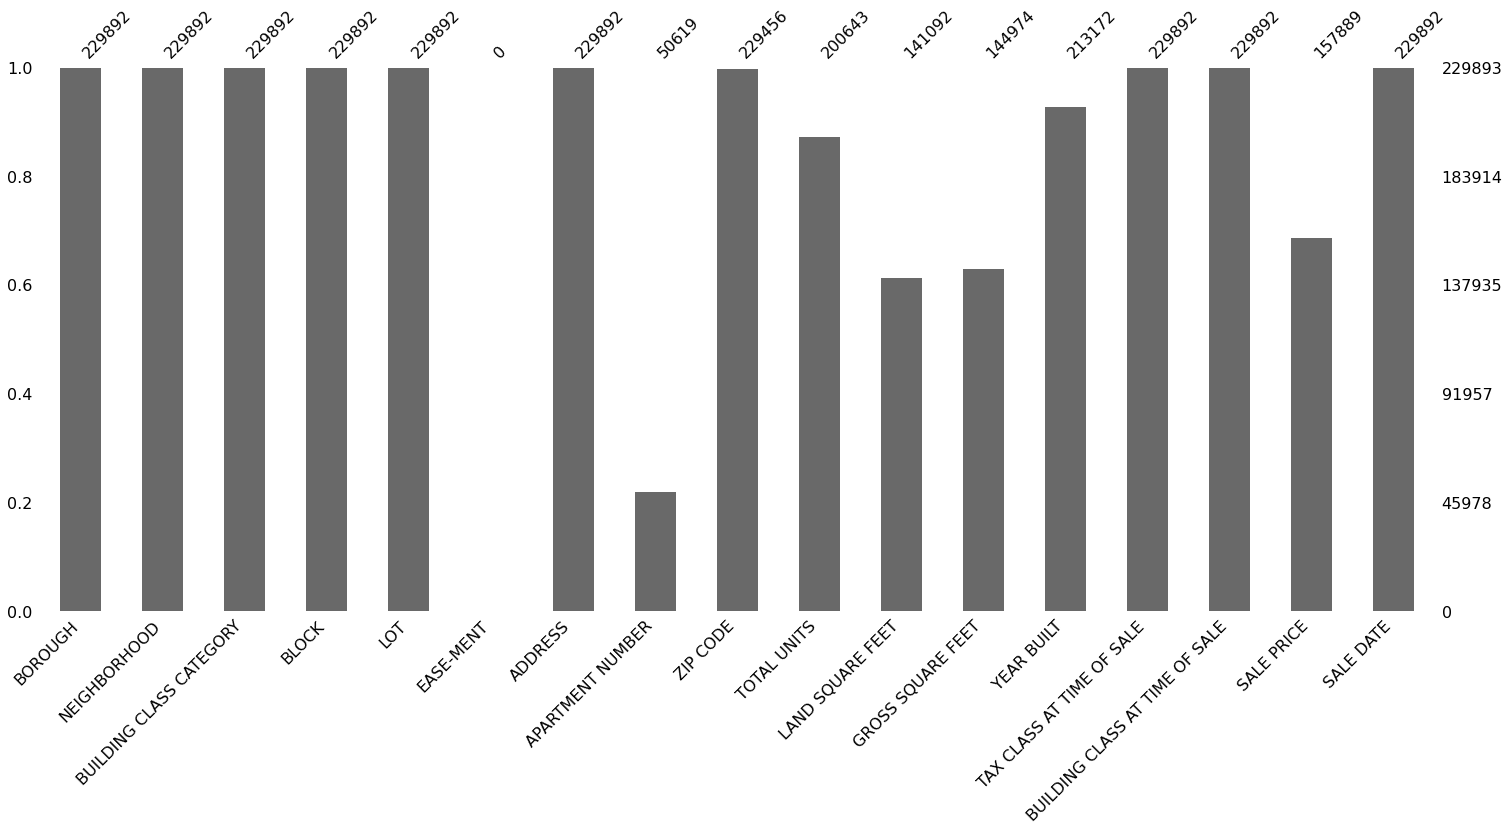

In [170]:
msno.bar(merged_dataSet) # Here bar plot for our data to see the missing values 

The above bar chart gives a quick graphical summary of the completeness of the dataset. 

# **Matrix Plot**

In [171]:
msno.matrix(merged_dataSet) # here we used Matrix Plot to check if Are there any variables often missing together 


# **Heatmap**

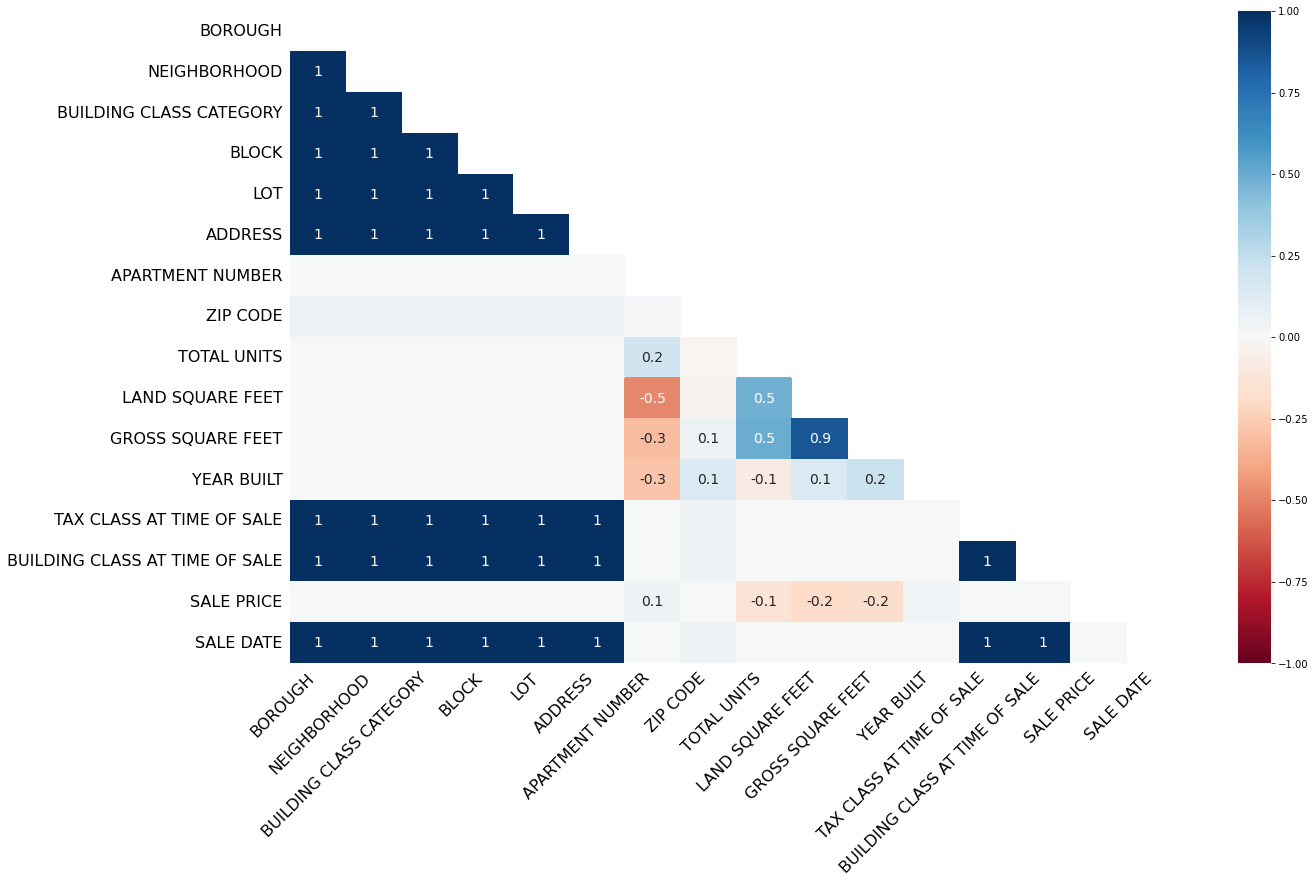

In [172]:
msno.heatmap(merged_dataSet) # heatMap

# **We noticed Zip code affected in Three columns :-**
1 - **Total unit**

2 - **LAND SQUARE FEET** 

3 - **GROSS SQUARE FEET** 



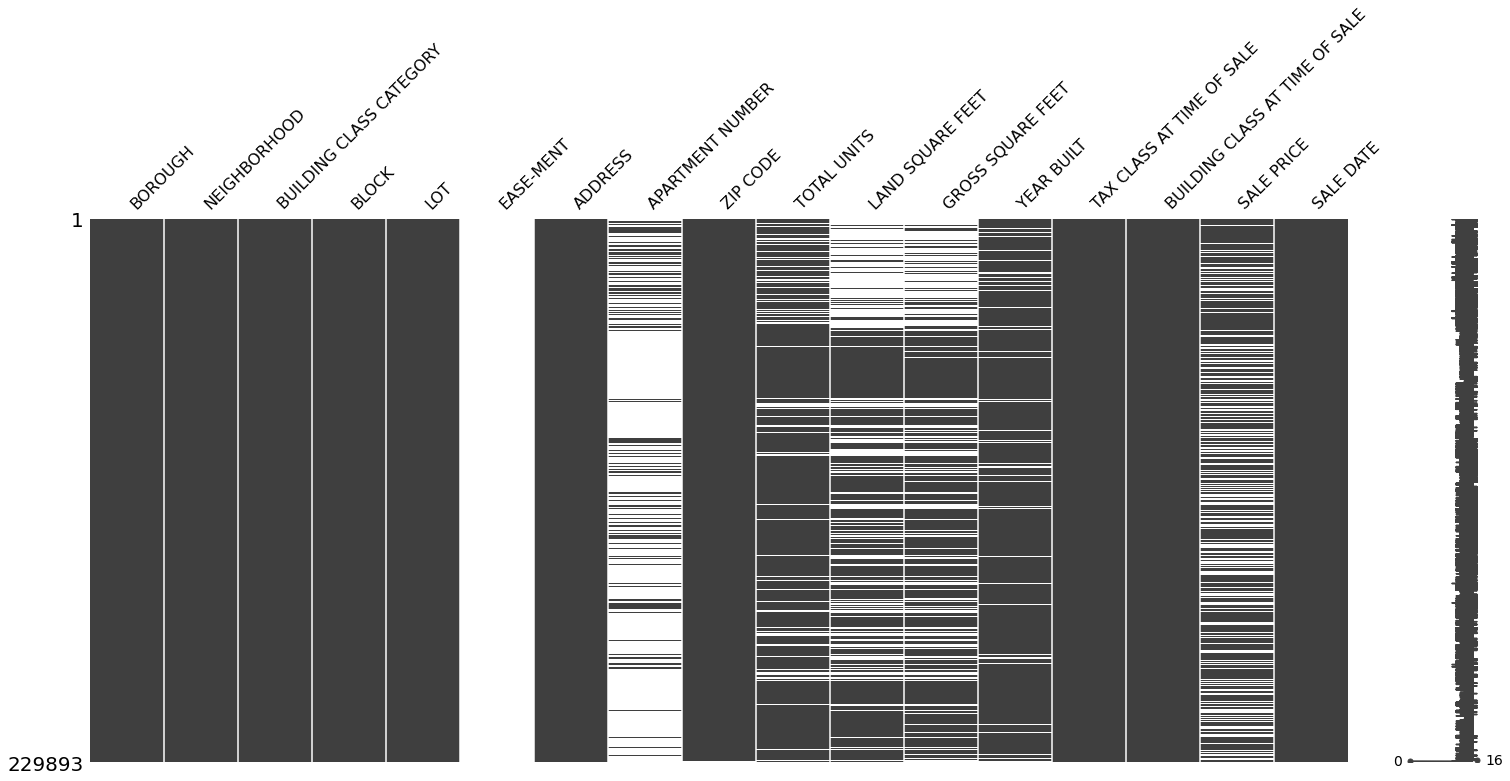

In [173]:
# we noticed Zip code affected in three columns :-
# 1 - Total unit
# 2 - LAND SQUARE FEET                   
# 3 - GROSS SQUARE FEET 
sorted = merged_dataSet.sort_values('ZIP CODE') # sort by zip code
msno.matrix(sorted)

# **Noticed the zipcode with 10001.0**

Affected in the Three columns :-

1 - **Total units**

2 - **LAND SQUARE FEET** 

3 - **GROSS SQUARE FEET** 


So , The type of missing here is **Missing at random (MAR)**


In [174]:
data = merged_dataSet.loc[(merged_dataSet["ZIP CODE"] == 10001.0)]
data

BOROUGH   NEIGHBORHOOD          BUILDING CLASS CATEGORY  BLOCK  \
38701       1.0        CHELSEA          01 ONE FAMILY DWELLINGS  722.0   
38722       1.0        CHELSEA   07 RENTALS - WALKUP APARTMENTS  753.0   
38767       1.0        CHELSEA     09 COOPS - WALKUP APARTMENTS  753.0   
38768       1.0        CHELSEA     09 COOPS - WALKUP APARTMENTS  753.0   
38817       1.0        CHELSEA   10 COOPS - ELEVATOR APARTMENTS  749.0   
...         ...            ...                              ...    ...   
229881      1.0  JAVITS CENTER  13 CONDOS - ELEVATOR APARTMENTS  702.0   
229882      1.0  JAVITS CENTER  13 CONDOS - ELEVATOR APARTMENTS  702.0   
229883      1.0  JAVITS CENTER  13 CONDOS - ELEVATOR APARTMENTS  702.0   
229885      1.0  JAVITS CENTER           14 RENTALS - 4-10 UNIT  731.0   
229886      1.0  JAVITS CENTER                 25 LUXURY HOTELS  729.0   

           LOT  EASE-MENT                   ADDRESS APARTMENT NUMBER  \
38701     73.0        NaN      462 WEST 25TH STREET              NaN   
38722     75.0        NaN      362 WEST 30TH STREET              NaN   
38767      8.0        NaN  355 WEST 29TH STREET, 2B              NaN   
38768      8.0        NaN  355 WEST 29TH STREET, 1A              NaN   
38817      1.0        NaN    365 W. 25TH STREET, 5A              NaN   
...        ...        ...                       ...              ...   
229881  1477.0        NaN     35 HUDSON YARDS, 6803             6803   
229882  1479.0        NaN     35 HUDSON YARDS, 6901             6901   
229883  1481.0        NaN     35 HUDSON YARDS, 6903             6903   
229885    43.0        NaN              419 9 AVENUE              NaN   
229886    61.0        NaN      440 WEST 33RD STREET              NaN   

        ZIP CODE  TOTAL UNITS LAND SQUARE FEET GROSS SQUARE FEET  YEAR BUILT  \
38701    10001.0          1.0             1370              4290      1970.0   
38722    10001.0          4.0             1975              2445      1900.0   
38767    10001.0          0.0              NaN               NaN      1900.0   
38768    10001.0          0.0              NaN               NaN      1900.0   
38817    10001.0          0.0              NaN               NaN      1963.0   
...          ...          ...              ...               ...         ...   
229881   10001.0          1.0              NaN               NaN      2015.0   
229882   10001.0          1.0              NaN               NaN      2015.0   
229883   10001.0          1.0              NaN               NaN      2015.0   
229885   10001.0          4.0             1975              1180      1930.0   
229886   10001.0          3.0            11540            202527      2018.0   

        TAX CLASS AT TIME OF SALE BUILDING CLASS AT TIME OF SALE SALE PRICE  \
38701                         1.0                             A5    5500000   
38722                         2.0                             C3    4400000   
38767                         2.0                             C6     900000   
38768                         2.0                             C6        NaN   
38817                         2.0                             D4     109845   
...                           ...                            ...        ...   
229881                        2.0                             R4    6113750   
229882                        2.0                             R4    6853750   
229883                        2.0                             R4    6173750   
229885                        2.0                             S3    7900000   
229886                        4.0                             H1        NaN   

        SALE DATE  
38701      2018.0  
38722      2018.0  
38767      2018.0  
38768      2018.0  
38817      2018.0  
...           ...  
229881     2020.0  
229882     2020.0  
229883     2020.0  
229885     2020.0  
229886     2020.0  

[872 rows x 17 columns]

##**Conclusion The most columns Affected by missing values are :-**
1- All Values of **EASE-MENT** Column are missed so we need to **drop** it . 

2- Noticed the values of **APARTMENT NUMBER** Column **( Missing Completely at Random )**
* Most of the values are missed so we can **drop** it .

3- Noticed the values of **SALE PRICE** Column **( Missing Completely at Random )**
* Can use **Simple Imputer** to fill gaps with mean .

4- Noticed the values of **YEAR BUILT** Column **( Missing Completely at Random )**
* Can use **Simple Imputer** to fill gaps with Most Frequent .

5- Noticed the zipcode column affected in Three column mention before **( Missing at random (MAR)**
* Can use **Multiple Imputer** to fill gaps with KNN .

# **Let's Solve the Missing According to each problem :-**

# **Solution of First and Second problem**
Drop 2 Columns :-

1- **EASE-MENT**

2- **APARTMENT NUMBER**  

In [175]:
merged_dataSet.drop(['EASE-MENT','APARTMENT NUMBER'], axis=1, inplace=True) # solution of the first and second prolem 


# **Solution of Third problem**
Solve the problem of **SALE PRICE** Column Using Simple Imputer with mean


In [176]:
merged_dataSet["SALE PRICE"] = merged_dataSet["SALE PRICE"].astype(np.float32) # convet values to numerical

merged_dataSet['SALE PRICE'].fillna(merged_dataSet['SALE PRICE'].mean(), inplace=True)
merged_dataSet['SALE PRICE']

0          241500.000
1          180000.000
2          455000.000
3          255000.000
4          340000.000
             ...     
276027     537000.000
276028     525000.000
276029    1890953.625
276030     500000.000
276031     500000.000
Name: SALE PRICE, Length: 229893, dtype: float32

# **Solution of Fourth problem**
Solve the problem of **YEAR BUILT** Column Using Simple Imputer with Most Frequent


In [177]:
merged_dataSet['YEAR BUILT'].fillna(merged_dataSet['YEAR BUILT'].mode().iloc[0], inplace=True)

# **Solution of Fifth problem**
**Multiple Imputer Using Knn Imputer**


In [178]:
selected_Column=[
'TOTAL UNITS',
'LAND SQUARE FEET',
'GROSS SQUARE FEET',
]

merged_dataSet["LAND SQUARE FEET"] = pd.to_numeric(merged_dataSet["LAND SQUARE FEET"]) # convet values to numerical
merged_dataSet["TOTAL UNITS"] = pd.to_numeric(merged_dataSet["TOTAL UNITS"]) # convet values to numerical
merged_dataSet["GROSS SQUARE FEET"] = pd.to_numeric(merged_dataSet["GROSS SQUARE FEET"]) # convet values to numerical



imputer = KNNImputer(n_neighbors=2, weights="uniform")
transform=imputer.fit_transform(merged_dataSet[selected_Column])
merged_dataSet[selected_Column]=transform
print('Missing: %d' % sum(isnan(transform).flatten()))

msno.matrix(merged_dataSet) # here we used Matrix Plot to check if Are there any variables often missing together 


Missing: 0


In [179]:
merged_dataSet

BOROUGH NEIGHBORHOOD     BUILDING CLASS CATEGORY   BLOCK   LOT  \
0           2.0     BATHGATE     01 ONE FAMILY DWELLINGS  2907.0  24.0   
1           2.0     BATHGATE     01 ONE FAMILY DWELLINGS  3030.0  62.0   
2           2.0     BATHGATE     01 ONE FAMILY DWELLINGS  3030.0  62.0   
3           2.0     BATHGATE     01 ONE FAMILY DWELLINGS  3030.0  70.0   
4           2.0     BATHGATE     01 ONE FAMILY DWELLINGS  3039.0  28.0   
...         ...          ...                         ...     ...   ...   
276027      5.0      WOODROW     02 TWO FAMILY DWELLINGS  7355.0  83.0   
276028      5.0      WOODROW     02 TWO FAMILY DWELLINGS  7355.0  84.0   
276029      5.0      WOODROW     02 TWO FAMILY DWELLINGS  7355.0  90.0   
276030      5.0      WOODROW  05 TAX CLASS 1 VACANT LAND  7094.0   1.0   
276031      5.0      WOODROW  05 TAX CLASS 1 VACANT LAND  7094.0   3.0   

                       ADDRESS  ZIP CODE  TOTAL UNITS  LAND SQUARE FEET  \
0             4090 PARK AVENUE   10457.0          1.0            2500.0   
1             4463 PARK AVENUE   10457.0          1.0            1578.0   
2             4463 PARK AVENUE   10457.0          1.0            1578.0   
3             4445 PARK AVENUE   10457.0          1.0            1694.0   
4       2329 WASHINGTON AVENUE   10458.0          1.0            1103.0   
...                        ...       ...          ...               ...   
276027      98 AMBASSADOR LANE   10309.0          2.0            2728.0   
276028     100 AMBASSADOR LANE   10309.0          2.0            2472.0   
276029     117 AMBASSADOR LANE   10309.0          2.0            7200.0   
276030          72 HARRIS LANE   10309.0          0.0            6079.0   
276031          74 HARRIS LANE   10309.0          0.0            5685.0   

        GROSS SQUARE FEET  YEAR BUILT  TAX CLASS AT TIME OF SALE  \
0                  1474.0      1901.0                        1.0   
1                  1470.0      1899.0                        1.0   
2                  1470.0      1899.0                        1.0   
3                  1497.0      1899.0                        1.0   
4                  1290.0      1910.0                        1.0   
...                   ...         ...                        ...   
276027             1980.0      2001.0                        1.0   
276028             1980.0      2001.0                        1.0   
276029             1710.0      2001.0                        1.0   
276030              821.5      1920.0                        1.0   
276031             1916.0      1920.0                        1.0   

       BUILDING CLASS AT TIME OF SALE   SALE PRICE  SALE DATE  
0                                  A1   241500.000     2018.0  
1                                  A1   180000.000     2018.0  
2                                  A1   455000.000     2018.0  
3                                  A1   255000.000     2018.0  
4                                  A1   340000.000     2018.0  
...                               ...          ...        ...  
276027                             B9   537000.000     2020.0  
276028                             B9   525000.000     2020.0  
276029                             B9  1890953.625     2020.0  
276030                             V0   500000.000     2020.0  
276031                             V0   500000.000     2020.0  

[229893 rows x 15 columns]

# **Part 3: Describe the Outliers**

# **Section 1**
In this section we will work on **numerical** columns like **BOROUGH** and **BLOCK** and **LOT** and **ZIP CODE** and **TOTAL UNITS** and **LAND SQUARE FEET** and **GROSS SQUARE FEET** and **YEAR BUILT** and **TAX CLASS AT TIME OF SALE** and **SALE PRICE** and **SALE DATE** to detect the Outliers .

In [180]:
merged_dataSet.describe()  # Describe the Outliers and scale 

BOROUGH          BLOCK            LOT       ZIP CODE  \
count  229892.000000  229892.000000  229892.000000  229456.000000   
mean        3.019387    4424.852861     357.706684   10864.589656   
std         1.274560    3656.221967     653.410115     557.750726   
min         1.000000       1.000000       1.000000   10001.000000   
25%         2.000000    1367.000000      22.000000   10307.000000   
50%         3.000000    3565.000000      49.000000   11210.000000   
75%         4.000000    6579.000000     318.000000   11358.000000   
max         5.000000   16350.000000    9116.000000   11697.000000   

         TOTAL UNITS  LAND SQUARE FEET  GROSS SQUARE FEET     YEAR BUILT  \
count  229893.000000      2.298930e+05       2.298930e+05  229893.000000   
mean        2.604671      7.494497e+03       4.134105e+03    1948.226771   
std        23.818995      1.034371e+05       3.617169e+04      34.362265   
min         0.000000      1.000000e+00       1.000000e+00    1018.000000   
25%         1.000000      2.039000e+03       1.330000e+03    1920.000000   
50%         1.000000      2.900000e+03       1.672000e+03    1940.000000   
75%         2.604671      5.188000e+03       3.056000e+03    1965.000000   
max      8816.000000      1.985040e+07       8.942176e+06    2021.000000   

       TAX CLASS AT TIME OF SALE    SALE PRICE      SALE DATE  
count              229892.000000  2.298930e+05  229892.000000  
mean                    1.618482  1.891686e+06    2018.911889  
std                     0.801129  1.217424e+07       0.792195  
min                     1.000000  1.000000e+00    2018.000000  
25%                     1.000000  5.420000e+05    2018.000000  
50%                     1.000000  1.050000e+06    2019.000000  
75%                     2.000000  1.890954e+06    2020.000000  
max                     4.000000  2.397502e+09    2020.000000

In [181]:
'''
This Function For remove OutLiers
'''
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

# **1- Boxplot of BOROUGH**
This graph represent the outliers in **BOROUGH** column

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


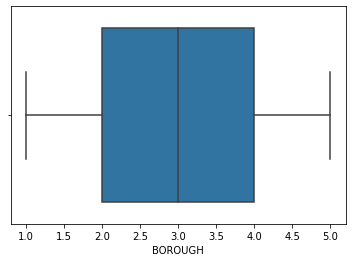

In [182]:
# Box Plot Of BOROUGH
sns.boxplot(merged_dataSet['BOROUGH'])

# **Handling** The Outliers of **BOROUGH** Column :-

In [183]:
merged_dataSet=remove_outlier(merged_dataSet,"BOROUGH") # Call remove outliers of BOROUGH column 
merged_dataSet

BOROUGH NEIGHBORHOOD     BUILDING CLASS CATEGORY   BLOCK   LOT  \
0           2.0     BATHGATE     01 ONE FAMILY DWELLINGS  2907.0  24.0   
1           2.0     BATHGATE     01 ONE FAMILY DWELLINGS  3030.0  62.0   
2           2.0     BATHGATE     01 ONE FAMILY DWELLINGS  3030.0  62.0   
3           2.0     BATHGATE     01 ONE FAMILY DWELLINGS  3030.0  70.0   
4           2.0     BATHGATE     01 ONE FAMILY DWELLINGS  3039.0  28.0   
...         ...          ...                         ...     ...   ...   
276027      5.0      WOODROW     02 TWO FAMILY DWELLINGS  7355.0  83.0   
276028      5.0      WOODROW     02 TWO FAMILY DWELLINGS  7355.0  84.0   
276029      5.0      WOODROW     02 TWO FAMILY DWELLINGS  7355.0  90.0   
276030      5.0      WOODROW  05 TAX CLASS 1 VACANT LAND  7094.0   1.0   
276031      5.0      WOODROW  05 TAX CLASS 1 VACANT LAND  7094.0   3.0   

                       ADDRESS  ZIP CODE  TOTAL UNITS  LAND SQUARE FEET  \
0             4090 PARK AVENUE   10457.0          1.0            2500.0   
1             4463 PARK AVENUE   10457.0          1.0            1578.0   
2             4463 PARK AVENUE   10457.0          1.0            1578.0   
3             4445 PARK AVENUE   10457.0          1.0            1694.0   
4       2329 WASHINGTON AVENUE   10458.0          1.0            1103.0   
...                        ...       ...          ...               ...   
276027      98 AMBASSADOR LANE   10309.0          2.0            2728.0   
276028     100 AMBASSADOR LANE   10309.0          2.0            2472.0   
276029     117 AMBASSADOR LANE   10309.0          2.0            7200.0   
276030          72 HARRIS LANE   10309.0          0.0            6079.0   
276031          74 HARRIS LANE   10309.0          0.0            5685.0   

        GROSS SQUARE FEET  YEAR BUILT  TAX CLASS AT TIME OF SALE  \
0                  1474.0      1901.0                        1.0   
1                  1470.0      1899.0                        1.0   
2                  1470.0      1899.0                        1.0   
3                  1497.0      1899.0                        1.0   
4                  1290.0      1910.0                        1.0   
...                   ...         ...                        ...   
276027             1980.0      2001.0                        1.0   
276028             1980.0      2001.0                        1.0   
276029             1710.0      2001.0                        1.0   
276030              821.5      1920.0                        1.0   
276031             1916.0      1920.0                        1.0   

       BUILDING CLASS AT TIME OF SALE   SALE PRICE  SALE DATE  
0                                  A1   241500.000     2018.0  
1                                  A1   180000.000     2018.0  
2                                  A1   455000.000     2018.0  
3                                  A1   255000.000     2018.0  
4                                  A1   340000.000     2018.0  
...                               ...          ...        ...  
276027                             B9   537000.000     2020.0  
276028                             B9   525000.000     2020.0  
276029                             B9  1890953.625     2020.0  
276030                             V0   500000.000     2020.0  
276031                             V0   500000.000     2020.0  

[229892 rows x 15 columns]

# **2- Boxplot of BLOCK**
This graph represent the outliers in **BLOCK** column

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


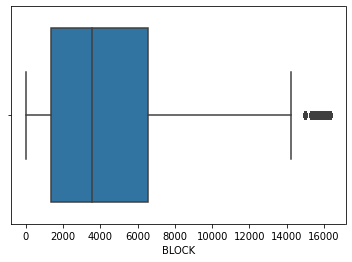

In [184]:
# Box Plot Of BLOCK
sns.boxplot(merged_dataSet['BLOCK'])

# **Handling** The Outliers of **BLOCK** Column :-

In [185]:
merged_dataSet=remove_outlier(merged_dataSet,"BLOCK") # Call remove outliers of BLOCK column 
merged_dataSet

BOROUGH NEIGHBORHOOD     BUILDING CLASS CATEGORY   BLOCK   LOT  \
0           2.0     BATHGATE     01 ONE FAMILY DWELLINGS  2907.0  24.0   
1           2.0     BATHGATE     01 ONE FAMILY DWELLINGS  3030.0  62.0   
2           2.0     BATHGATE     01 ONE FAMILY DWELLINGS  3030.0  62.0   
3           2.0     BATHGATE     01 ONE FAMILY DWELLINGS  3030.0  70.0   
4           2.0     BATHGATE     01 ONE FAMILY DWELLINGS  3039.0  28.0   
...         ...          ...                         ...     ...   ...   
276027      5.0      WOODROW     02 TWO FAMILY DWELLINGS  7355.0  83.0   
276028      5.0      WOODROW     02 TWO FAMILY DWELLINGS  7355.0  84.0   
276029      5.0      WOODROW     02 TWO FAMILY DWELLINGS  7355.0  90.0   
276030      5.0      WOODROW  05 TAX CLASS 1 VACANT LAND  7094.0   1.0   
276031      5.0      WOODROW  05 TAX CLASS 1 VACANT LAND  7094.0   3.0   

                       ADDRESS  ZIP CODE  TOTAL UNITS  LAND SQUARE FEET  \
0             4090 PARK AVENUE   10457.0          1.0            2500.0   
1             4463 PARK AVENUE   10457.0          1.0            1578.0   
2             4463 PARK AVENUE   10457.0          1.0            1578.0   
3             4445 PARK AVENUE   10457.0          1.0            1694.0   
4       2329 WASHINGTON AVENUE   10458.0          1.0            1103.0   
...                        ...       ...          ...               ...   
276027      98 AMBASSADOR LANE   10309.0          2.0            2728.0   
276028     100 AMBASSADOR LANE   10309.0          2.0            2472.0   
276029     117 AMBASSADOR LANE   10309.0          2.0            7200.0   
276030          72 HARRIS LANE   10309.0          0.0            6079.0   
276031          74 HARRIS LANE   10309.0          0.0            5685.0   

        GROSS SQUARE FEET  YEAR BUILT  TAX CLASS AT TIME OF SALE  \
0                  1474.0      1901.0                        1.0   
1                  1470.0      1899.0                        1.0   
2                  1470.0      1899.0                        1.0   
3                  1497.0      1899.0                        1.0   
4                  1290.0      1910.0                        1.0   
...                   ...         ...                        ...   
276027             1980.0      2001.0                        1.0   
276028             1980.0      2001.0                        1.0   
276029             1710.0      2001.0                        1.0   
276030              821.5      1920.0                        1.0   
276031             1916.0      1920.0                        1.0   

       BUILDING CLASS AT TIME OF SALE   SALE PRICE  SALE DATE  
0                                  A1   241500.000     2018.0  
1                                  A1   180000.000     2018.0  
2                                  A1   455000.000     2018.0  
3                                  A1   255000.000     2018.0  
4                                  A1   340000.000     2018.0  
...                               ...          ...        ...  
276027                             B9   537000.000     2020.0  
276028                             B9   525000.000     2020.0  
276029                             B9  1890953.625     2020.0  
276030                             V0   500000.000     2020.0  
276031                             V0   500000.000     2020.0  

[226459 rows x 15 columns]

# **3- Boxplot of LOT**
This graph represent the outliers in **LOT** column

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


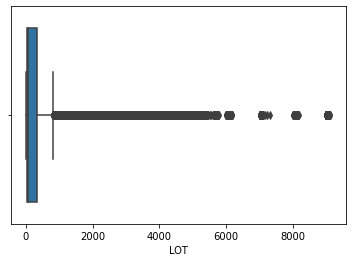

In [186]:
# Box Plot Of LOT
sns.boxplot(merged_dataSet['LOT'])

# **Handling** The Outliers of **LOT** Column :-

In [187]:
merged_dataSet=remove_outlier(merged_dataSet,"LOT") # Call remove outliers of LOT column 
merged_dataSet

BOROUGH NEIGHBORHOOD     BUILDING CLASS CATEGORY   BLOCK   LOT  \
0           2.0     BATHGATE     01 ONE FAMILY DWELLINGS  2907.0  24.0   
1           2.0     BATHGATE     01 ONE FAMILY DWELLINGS  3030.0  62.0   
2           2.0     BATHGATE     01 ONE FAMILY DWELLINGS  3030.0  62.0   
3           2.0     BATHGATE     01 ONE FAMILY DWELLINGS  3030.0  70.0   
4           2.0     BATHGATE     01 ONE FAMILY DWELLINGS  3039.0  28.0   
...         ...          ...                         ...     ...   ...   
276027      5.0      WOODROW     02 TWO FAMILY DWELLINGS  7355.0  83.0   
276028      5.0      WOODROW     02 TWO FAMILY DWELLINGS  7355.0  84.0   
276029      5.0      WOODROW     02 TWO FAMILY DWELLINGS  7355.0  90.0   
276030      5.0      WOODROW  05 TAX CLASS 1 VACANT LAND  7094.0   1.0   
276031      5.0      WOODROW  05 TAX CLASS 1 VACANT LAND  7094.0   3.0   

                       ADDRESS  ZIP CODE  TOTAL UNITS  LAND SQUARE FEET  \
0             4090 PARK AVENUE   10457.0          1.0            2500.0   
1             4463 PARK AVENUE   10457.0          1.0            1578.0   
2             4463 PARK AVENUE   10457.0          1.0            1578.0   
3             4445 PARK AVENUE   10457.0          1.0            1694.0   
4       2329 WASHINGTON AVENUE   10458.0          1.0            1103.0   
...                        ...       ...          ...               ...   
276027      98 AMBASSADOR LANE   10309.0          2.0            2728.0   
276028     100 AMBASSADOR LANE   10309.0          2.0            2472.0   
276029     117 AMBASSADOR LANE   10309.0          2.0            7200.0   
276030          72 HARRIS LANE   10309.0          0.0            6079.0   
276031          74 HARRIS LANE   10309.0          0.0            5685.0   

        GROSS SQUARE FEET  YEAR BUILT  TAX CLASS AT TIME OF SALE  \
0                  1474.0      1901.0                        1.0   
1                  1470.0      1899.0                        1.0   
2                  1470.0      1899.0                        1.0   
3                  1497.0      1899.0                        1.0   
4                  1290.0      1910.0                        1.0   
...                   ...         ...                        ...   
276027             1980.0      2001.0                        1.0   
276028             1980.0      2001.0                        1.0   
276029             1710.0      2001.0                        1.0   
276030              821.5      1920.0                        1.0   
276031             1916.0      1920.0                        1.0   

       BUILDING CLASS AT TIME OF SALE   SALE PRICE  SALE DATE  
0                                  A1   241500.000     2018.0  
1                                  A1   180000.000     2018.0  
2                                  A1   455000.000     2018.0  
3                                  A1   255000.000     2018.0  
4                                  A1   340000.000     2018.0  
...                               ...          ...        ...  
276027                             B9   537000.000     2020.0  
276028                             B9   525000.000     2020.0  
276029                             B9  1890953.625     2020.0  
276030                             V0   500000.000     2020.0  
276031                             V0   500000.000     2020.0  

[172607 rows x 15 columns]

# **4- Boxplot of ZIP CODE**
This graph represent the outliers in **ZIP CODE** column

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


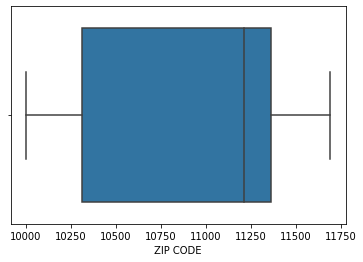

In [188]:
# Box Plot Of ZIP CODE
sns.boxplot(merged_dataSet['ZIP CODE'])

# **Handling** The Outliers of **ZIP CODE** Column :-

In [189]:
merged_dataSet=remove_outlier(merged_dataSet,"ZIP CODE") # Call remove outliers of ZIP CODE column 
merged_dataSet

BOROUGH NEIGHBORHOOD     BUILDING CLASS CATEGORY   BLOCK   LOT  \
0           2.0     BATHGATE     01 ONE FAMILY DWELLINGS  2907.0  24.0   
1           2.0     BATHGATE     01 ONE FAMILY DWELLINGS  3030.0  62.0   
2           2.0     BATHGATE     01 ONE FAMILY DWELLINGS  3030.0  62.0   
3           2.0     BATHGATE     01 ONE FAMILY DWELLINGS  3030.0  70.0   
4           2.0     BATHGATE     01 ONE FAMILY DWELLINGS  3039.0  28.0   
...         ...          ...                         ...     ...   ...   
276027      5.0      WOODROW     02 TWO FAMILY DWELLINGS  7355.0  83.0   
276028      5.0      WOODROW     02 TWO FAMILY DWELLINGS  7355.0  84.0   
276029      5.0      WOODROW     02 TWO FAMILY DWELLINGS  7355.0  90.0   
276030      5.0      WOODROW  05 TAX CLASS 1 VACANT LAND  7094.0   1.0   
276031      5.0      WOODROW  05 TAX CLASS 1 VACANT LAND  7094.0   3.0   

                       ADDRESS  ZIP CODE  TOTAL UNITS  LAND SQUARE FEET  \
0             4090 PARK AVENUE   10457.0          1.0            2500.0   
1             4463 PARK AVENUE   10457.0          1.0            1578.0   
2             4463 PARK AVENUE   10457.0          1.0            1578.0   
3             4445 PARK AVENUE   10457.0          1.0            1694.0   
4       2329 WASHINGTON AVENUE   10458.0          1.0            1103.0   
...                        ...       ...          ...               ...   
276027      98 AMBASSADOR LANE   10309.0          2.0            2728.0   
276028     100 AMBASSADOR LANE   10309.0          2.0            2472.0   
276029     117 AMBASSADOR LANE   10309.0          2.0            7200.0   
276030          72 HARRIS LANE   10309.0          0.0            6079.0   
276031          74 HARRIS LANE   10309.0          0.0            5685.0   

        GROSS SQUARE FEET  YEAR BUILT  TAX CLASS AT TIME OF SALE  \
0                  1474.0      1901.0                        1.0   
1                  1470.0      1899.0                        1.0   
2                  1470.0      1899.0                        1.0   
3                  1497.0      1899.0                        1.0   
4                  1290.0      1910.0                        1.0   
...                   ...         ...                        ...   
276027             1980.0      2001.0                        1.0   
276028             1980.0      2001.0                        1.0   
276029             1710.0      2001.0                        1.0   
276030              821.5      1920.0                        1.0   
276031             1916.0      1920.0                        1.0   

       BUILDING CLASS AT TIME OF SALE   SALE PRICE  SALE DATE  
0                                  A1   241500.000     2018.0  
1                                  A1   180000.000     2018.0  
2                                  A1   455000.000     2018.0  
3                                  A1   255000.000     2018.0  
4                                  A1   340000.000     2018.0  
...                               ...          ...        ...  
276027                             B9   537000.000     2020.0  
276028                             B9   525000.000     2020.0  
276029                             B9  1890953.625     2020.0  
276030                             V0   500000.000     2020.0  
276031                             V0   500000.000     2020.0  

[172245 rows x 15 columns]

# **5- Boxplot of TOTAL UNITS**
This graph represent the outliers in **TOTAL UNITS** column

In [190]:
# Box Plot Of TOTAL UNITS
sns.boxplot(merged_dataSet['TOTAL UNITS'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


# **Handling** The Outliers of **TOTAL UNITS** Column :-

In [191]:
merged_dataSet=remove_outlier(merged_dataSet,"TOTAL UNITS") # Call remove outliers of TOTAL UNITS column 
merged_dataSet

BOROUGH NEIGHBORHOOD     BUILDING CLASS CATEGORY   BLOCK   LOT  \
0           2.0     BATHGATE     01 ONE FAMILY DWELLINGS  2907.0  24.0   
1           2.0     BATHGATE     01 ONE FAMILY DWELLINGS  3030.0  62.0   
2           2.0     BATHGATE     01 ONE FAMILY DWELLINGS  3030.0  62.0   
3           2.0     BATHGATE     01 ONE FAMILY DWELLINGS  3030.0  70.0   
4           2.0     BATHGATE     01 ONE FAMILY DWELLINGS  3039.0  28.0   
...         ...          ...                         ...     ...   ...   
276027      5.0      WOODROW     02 TWO FAMILY DWELLINGS  7355.0  83.0   
276028      5.0      WOODROW     02 TWO FAMILY DWELLINGS  7355.0  84.0   
276029      5.0      WOODROW     02 TWO FAMILY DWELLINGS  7355.0  90.0   
276030      5.0      WOODROW  05 TAX CLASS 1 VACANT LAND  7094.0   1.0   
276031      5.0      WOODROW  05 TAX CLASS 1 VACANT LAND  7094.0   3.0   

                       ADDRESS  ZIP CODE  TOTAL UNITS  LAND SQUARE FEET  \
0             4090 PARK AVENUE   10457.0          1.0            2500.0   
1             4463 PARK AVENUE   10457.0          1.0            1578.0   
2             4463 PARK AVENUE   10457.0          1.0            1578.0   
3             4445 PARK AVENUE   10457.0          1.0            1694.0   
4       2329 WASHINGTON AVENUE   10458.0          1.0            1103.0   
...                        ...       ...          ...               ...   
276027      98 AMBASSADOR LANE   10309.0          2.0            2728.0   
276028     100 AMBASSADOR LANE   10309.0          2.0            2472.0   
276029     117 AMBASSADOR LANE   10309.0          2.0            7200.0   
276030          72 HARRIS LANE   10309.0          0.0            6079.0   
276031          74 HARRIS LANE   10309.0          0.0            5685.0   

        GROSS SQUARE FEET  YEAR BUILT  TAX CLASS AT TIME OF SALE  \
0                  1474.0      1901.0                        1.0   
1                  1470.0      1899.0                        1.0   
2                  1470.0      1899.0                        1.0   
3                  1497.0      1899.0                        1.0   
4                  1290.0      1910.0                        1.0   
...                   ...         ...                        ...   
276027             1980.0      2001.0                        1.0   
276028             1980.0      2001.0                        1.0   
276029             1710.0      2001.0                        1.0   
276030              821.5      1920.0                        1.0   
276031             1916.0      1920.0                        1.0   

       BUILDING CLASS AT TIME OF SALE   SALE PRICE  SALE DATE  
0                                  A1   241500.000     2018.0  
1                                  A1   180000.000     2018.0  
2                                  A1   455000.000     2018.0  
3                                  A1   255000.000     2018.0  
4                                  A1   340000.000     2018.0  
...                               ...          ...        ...  
276027                             B9   537000.000     2020.0  
276028                             B9   525000.000     2020.0  
276029                             B9  1890953.625     2020.0  
276030                             V0   500000.000     2020.0  
276031                             V0   500000.000     2020.0  

[164717 rows x 15 columns]

# **6 -Boxplot of LAND SQUARE FEET**
This graph represent the outliers in **LAND SQUARE FEET** column

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


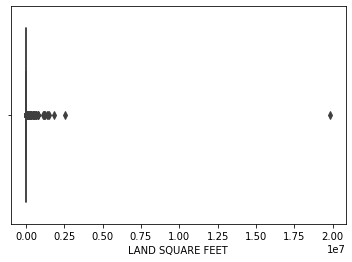

In [192]:
# Box Plot Of LAND SQUARE FEET
sns.boxplot(merged_dataSet['LAND SQUARE FEET'])

# **Handling** The Outliers of **LAND SQUARE FEET** Column :-

In [193]:
merged_dataSet=remove_outlier(merged_dataSet,"LAND SQUARE FEET") # Call remove outliers of LAND SQUARE FEET column 
merged_dataSet

BOROUGH NEIGHBORHOOD     BUILDING CLASS CATEGORY   BLOCK   LOT  \
0           2.0     BATHGATE     01 ONE FAMILY DWELLINGS  2907.0  24.0   
1           2.0     BATHGATE     01 ONE FAMILY DWELLINGS  3030.0  62.0   
2           2.0     BATHGATE     01 ONE FAMILY DWELLINGS  3030.0  62.0   
3           2.0     BATHGATE     01 ONE FAMILY DWELLINGS  3030.0  70.0   
4           2.0     BATHGATE     01 ONE FAMILY DWELLINGS  3039.0  28.0   
...         ...          ...                         ...     ...   ...   
276027      5.0      WOODROW     02 TWO FAMILY DWELLINGS  7355.0  83.0   
276028      5.0      WOODROW     02 TWO FAMILY DWELLINGS  7355.0  84.0   
276029      5.0      WOODROW     02 TWO FAMILY DWELLINGS  7355.0  90.0   
276030      5.0      WOODROW  05 TAX CLASS 1 VACANT LAND  7094.0   1.0   
276031      5.0      WOODROW  05 TAX CLASS 1 VACANT LAND  7094.0   3.0   

                       ADDRESS  ZIP CODE  TOTAL UNITS  LAND SQUARE FEET  \
0             4090 PARK AVENUE   10457.0          1.0            2500.0   
1             4463 PARK AVENUE   10457.0          1.0            1578.0   
2             4463 PARK AVENUE   10457.0          1.0            1578.0   
3             4445 PARK AVENUE   10457.0          1.0            1694.0   
4       2329 WASHINGTON AVENUE   10458.0          1.0            1103.0   
...                        ...       ...          ...               ...   
276027      98 AMBASSADOR LANE   10309.0          2.0            2728.0   
276028     100 AMBASSADOR LANE   10309.0          2.0            2472.0   
276029     117 AMBASSADOR LANE   10309.0          2.0            7200.0   
276030          72 HARRIS LANE   10309.0          0.0            6079.0   
276031          74 HARRIS LANE   10309.0          0.0            5685.0   

        GROSS SQUARE FEET  YEAR BUILT  TAX CLASS AT TIME OF SALE  \
0                  1474.0      1901.0                        1.0   
1                  1470.0      1899.0                        1.0   
2                  1470.0      1899.0                        1.0   
3                  1497.0      1899.0                        1.0   
4                  1290.0      1910.0                        1.0   
...                   ...         ...                        ...   
276027             1980.0      2001.0                        1.0   
276028             1980.0      2001.0                        1.0   
276029             1710.0      2001.0                        1.0   
276030              821.5      1920.0                        1.0   
276031             1916.0      1920.0                        1.0   

       BUILDING CLASS AT TIME OF SALE   SALE PRICE  SALE DATE  
0                                  A1   241500.000     2018.0  
1                                  A1   180000.000     2018.0  
2                                  A1   455000.000     2018.0  
3                                  A1   255000.000     2018.0  
4                                  A1   340000.000     2018.0  
...                               ...          ...        ...  
276027                             B9   537000.000     2020.0  
276028                             B9   525000.000     2020.0  
276029                             B9  1890953.625     2020.0  
276030                             V0   500000.000     2020.0  
276031                             V0   500000.000     2020.0  

[161099 rows x 15 columns]

# **7 -Boxplot of GROSS SQUARE FEET**
This graph represent the outliers in **GROSS SQUARE FEET** column

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


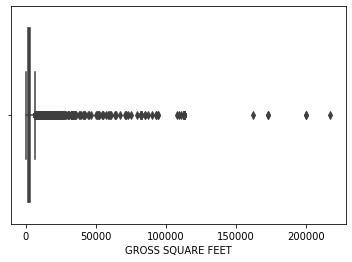

In [194]:
# Box Plot Of GROSS SQUARE FEET
sns.boxplot(merged_dataSet['GROSS SQUARE FEET'])

# **Handling** The Outliers of **GROSS SQUARE FEET** Column :-

In [195]:
merged_dataSet=remove_outlier(merged_dataSet,"GROSS SQUARE FEET") # Call remove outliers of GROSS SQUARE FEET column 
merged_dataSet

BOROUGH NEIGHBORHOOD     BUILDING CLASS CATEGORY   BLOCK   LOT  \
0           2.0     BATHGATE     01 ONE FAMILY DWELLINGS  2907.0  24.0   
1           2.0     BATHGATE     01 ONE FAMILY DWELLINGS  3030.0  62.0   
2           2.0     BATHGATE     01 ONE FAMILY DWELLINGS  3030.0  62.0   
3           2.0     BATHGATE     01 ONE FAMILY DWELLINGS  3030.0  70.0   
4           2.0     BATHGATE     01 ONE FAMILY DWELLINGS  3039.0  28.0   
...         ...          ...                         ...     ...   ...   
276027      5.0      WOODROW     02 TWO FAMILY DWELLINGS  7355.0  83.0   
276028      5.0      WOODROW     02 TWO FAMILY DWELLINGS  7355.0  84.0   
276029      5.0      WOODROW     02 TWO FAMILY DWELLINGS  7355.0  90.0   
276030      5.0      WOODROW  05 TAX CLASS 1 VACANT LAND  7094.0   1.0   
276031      5.0      WOODROW  05 TAX CLASS 1 VACANT LAND  7094.0   3.0   

                       ADDRESS  ZIP CODE  TOTAL UNITS  LAND SQUARE FEET  \
0             4090 PARK AVENUE   10457.0          1.0            2500.0   
1             4463 PARK AVENUE   10457.0          1.0            1578.0   
2             4463 PARK AVENUE   10457.0          1.0            1578.0   
3             4445 PARK AVENUE   10457.0          1.0            1694.0   
4       2329 WASHINGTON AVENUE   10458.0          1.0            1103.0   
...                        ...       ...          ...               ...   
276027      98 AMBASSADOR LANE   10309.0          2.0            2728.0   
276028     100 AMBASSADOR LANE   10309.0          2.0            2472.0   
276029     117 AMBASSADOR LANE   10309.0          2.0            7200.0   
276030          72 HARRIS LANE   10309.0          0.0            6079.0   
276031          74 HARRIS LANE   10309.0          0.0            5685.0   

        GROSS SQUARE FEET  YEAR BUILT  TAX CLASS AT TIME OF SALE  \
0                  1474.0      1901.0                        1.0   
1                  1470.0      1899.0                        1.0   
2                  1470.0      1899.0                        1.0   
3                  1497.0      1899.0                        1.0   
4                  1290.0      1910.0                        1.0   
...                   ...         ...                        ...   
276027             1980.0      2001.0                        1.0   
276028             1980.0      2001.0                        1.0   
276029             1710.0      2001.0                        1.0   
276030              821.5      1920.0                        1.0   
276031             1916.0      1920.0                        1.0   

       BUILDING CLASS AT TIME OF SALE   SALE PRICE  SALE DATE  
0                                  A1   241500.000     2018.0  
1                                  A1   180000.000     2018.0  
2                                  A1   455000.000     2018.0  
3                                  A1   255000.000     2018.0  
4                                  A1   340000.000     2018.0  
...                               ...          ...        ...  
276027                             B9   537000.000     2020.0  
276028                             B9   525000.000     2020.0  
276029                             B9  1890953.625     2020.0  
276030                             V0   500000.000     2020.0  
276031                             V0   500000.000     2020.0  

[159585 rows x 15 columns]

# **8 -Boxplot of YEAR BUILT**
This graph represent the outliers in **YEAR BUILT** column

In [196]:
# Box Plot Of YEAR BUILT
sns.boxplot(merged_dataSet['YEAR BUILT'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


# **Handling** The Outliers of **YEAR BUILT** Column :-

In [197]:
merged_dataSet=remove_outlier(merged_dataSet,"YEAR BUILT") # Call remove outliers of YEAR BUILT column 
merged_dataSet

BOROUGH NEIGHBORHOOD     BUILDING CLASS CATEGORY   BLOCK   LOT  \
0           2.0     BATHGATE     01 ONE FAMILY DWELLINGS  2907.0  24.0   
1           2.0     BATHGATE     01 ONE FAMILY DWELLINGS  3030.0  62.0   
2           2.0     BATHGATE     01 ONE FAMILY DWELLINGS  3030.0  62.0   
3           2.0     BATHGATE     01 ONE FAMILY DWELLINGS  3030.0  70.0   
4           2.0     BATHGATE     01 ONE FAMILY DWELLINGS  3039.0  28.0   
...         ...          ...                         ...     ...   ...   
276027      5.0      WOODROW     02 TWO FAMILY DWELLINGS  7355.0  83.0   
276028      5.0      WOODROW     02 TWO FAMILY DWELLINGS  7355.0  84.0   
276029      5.0      WOODROW     02 TWO FAMILY DWELLINGS  7355.0  90.0   
276030      5.0      WOODROW  05 TAX CLASS 1 VACANT LAND  7094.0   1.0   
276031      5.0      WOODROW  05 TAX CLASS 1 VACANT LAND  7094.0   3.0   

                       ADDRESS  ZIP CODE  TOTAL UNITS  LAND SQUARE FEET  \
0             4090 PARK AVENUE   10457.0          1.0            2500.0   
1             4463 PARK AVENUE   10457.0          1.0            1578.0   
2             4463 PARK AVENUE   10457.0          1.0            1578.0   
3             4445 PARK AVENUE   10457.0          1.0            1694.0   
4       2329 WASHINGTON AVENUE   10458.0          1.0            1103.0   
...                        ...       ...          ...               ...   
276027      98 AMBASSADOR LANE   10309.0          2.0            2728.0   
276028     100 AMBASSADOR LANE   10309.0          2.0            2472.0   
276029     117 AMBASSADOR LANE   10309.0          2.0            7200.0   
276030          72 HARRIS LANE   10309.0          0.0            6079.0   
276031          74 HARRIS LANE   10309.0          0.0            5685.0   

        GROSS SQUARE FEET  YEAR BUILT  TAX CLASS AT TIME OF SALE  \
0                  1474.0      1901.0                        1.0   
1                  1470.0      1899.0                        1.0   
2                  1470.0      1899.0                        1.0   
3                  1497.0      1899.0                        1.0   
4                  1290.0      1910.0                        1.0   
...                   ...         ...                        ...   
276027             1980.0      2001.0                        1.0   
276028             1980.0      2001.0                        1.0   
276029             1710.0      2001.0                        1.0   
276030              821.5      1920.0                        1.0   
276031             1916.0      1920.0                        1.0   

       BUILDING CLASS AT TIME OF SALE   SALE PRICE  SALE DATE  
0                                  A1   241500.000     2018.0  
1                                  A1   180000.000     2018.0  
2                                  A1   455000.000     2018.0  
3                                  A1   255000.000     2018.0  
4                                  A1   340000.000     2018.0  
...                               ...          ...        ...  
276027                             B9   537000.000     2020.0  
276028                             B9   525000.000     2020.0  
276029                             B9  1890953.625     2020.0  
276030                             V0   500000.000     2020.0  
276031                             V0   500000.000     2020.0  

[159457 rows x 15 columns]

# **9 -Boxplot of TAX CLASS AT TIME OF SALE**
This graph represent the outliers in **TAX CLASS AT TIME OF SALE** column

In [198]:
# Box Plot Of TAX CLASS AT TIME OF SALE
sns.boxplot(merged_dataSet['TAX CLASS AT TIME OF SALE'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


# **Handling** The Outliers of **TAX CLASS AT TIME OF SALE** Column :-

In [199]:
merged_dataSet=remove_outlier(merged_dataSet,"TAX CLASS AT TIME OF SALE") # Call remove outliers of TAX CLASS AT TIME OF SALE column 
merged_dataSet

BOROUGH NEIGHBORHOOD     BUILDING CLASS CATEGORY   BLOCK   LOT  \
0           2.0     BATHGATE     01 ONE FAMILY DWELLINGS  2907.0  24.0   
1           2.0     BATHGATE     01 ONE FAMILY DWELLINGS  3030.0  62.0   
2           2.0     BATHGATE     01 ONE FAMILY DWELLINGS  3030.0  62.0   
3           2.0     BATHGATE     01 ONE FAMILY DWELLINGS  3030.0  70.0   
4           2.0     BATHGATE     01 ONE FAMILY DWELLINGS  3039.0  28.0   
...         ...          ...                         ...     ...   ...   
276027      5.0      WOODROW     02 TWO FAMILY DWELLINGS  7355.0  83.0   
276028      5.0      WOODROW     02 TWO FAMILY DWELLINGS  7355.0  84.0   
276029      5.0      WOODROW     02 TWO FAMILY DWELLINGS  7355.0  90.0   
276030      5.0      WOODROW  05 TAX CLASS 1 VACANT LAND  7094.0   1.0   
276031      5.0      WOODROW  05 TAX CLASS 1 VACANT LAND  7094.0   3.0   

                       ADDRESS  ZIP CODE  TOTAL UNITS  LAND SQUARE FEET  \
0             4090 PARK AVENUE   10457.0          1.0            2500.0   
1             4463 PARK AVENUE   10457.0          1.0            1578.0   
2             4463 PARK AVENUE   10457.0          1.0            1578.0   
3             4445 PARK AVENUE   10457.0          1.0            1694.0   
4       2329 WASHINGTON AVENUE   10458.0          1.0            1103.0   
...                        ...       ...          ...               ...   
276027      98 AMBASSADOR LANE   10309.0          2.0            2728.0   
276028     100 AMBASSADOR LANE   10309.0          2.0            2472.0   
276029     117 AMBASSADOR LANE   10309.0          2.0            7200.0   
276030          72 HARRIS LANE   10309.0          0.0            6079.0   
276031          74 HARRIS LANE   10309.0          0.0            5685.0   

        GROSS SQUARE FEET  YEAR BUILT  TAX CLASS AT TIME OF SALE  \
0                  1474.0      1901.0                        1.0   
1                  1470.0      1899.0                        1.0   
2                  1470.0      1899.0                        1.0   
3                  1497.0      1899.0                        1.0   
4                  1290.0      1910.0                        1.0   
...                   ...         ...                        ...   
276027             1980.0      2001.0                        1.0   
276028             1980.0      2001.0                        1.0   
276029             1710.0      2001.0                        1.0   
276030              821.5      1920.0                        1.0   
276031             1916.0      1920.0                        1.0   

       BUILDING CLASS AT TIME OF SALE   SALE PRICE  SALE DATE  
0                                  A1   241500.000     2018.0  
1                                  A1   180000.000     2018.0  
2                                  A1   455000.000     2018.0  
3                                  A1   255000.000     2018.0  
4                                  A1   340000.000     2018.0  
...                               ...          ...        ...  
276027                             B9   537000.000     2020.0  
276028                             B9   525000.000     2020.0  
276029                             B9  1890953.625     2020.0  
276030                             V0   500000.000     2020.0  
276031                             V0   500000.000     2020.0  

[154597 rows x 15 columns]

# **10 -Boxplot of SALE PRICE**
This graph represent the outliers in **SALE PRICE** column

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


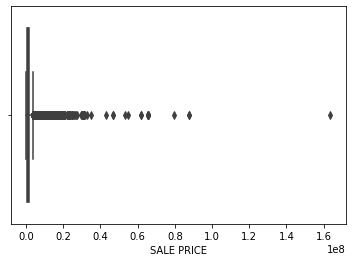

In [200]:
# Box Plot Of SALE PRICE
sns.boxplot(merged_dataSet['SALE PRICE'])

# **Handling** The Outliers of **SALE PRICE** Column :-

In [201]:
merged_dataSet=remove_outlier(merged_dataSet,"SALE PRICE") # Call remove outliers of SALE PRICE column 
merged_dataSet

BOROUGH NEIGHBORHOOD     BUILDING CLASS CATEGORY   BLOCK   LOT  \
0           2.0     BATHGATE     01 ONE FAMILY DWELLINGS  2907.0  24.0   
1           2.0     BATHGATE     01 ONE FAMILY DWELLINGS  3030.0  62.0   
2           2.0     BATHGATE     01 ONE FAMILY DWELLINGS  3030.0  62.0   
3           2.0     BATHGATE     01 ONE FAMILY DWELLINGS  3030.0  70.0   
4           2.0     BATHGATE     01 ONE FAMILY DWELLINGS  3039.0  28.0   
...         ...          ...                         ...     ...   ...   
276027      5.0      WOODROW     02 TWO FAMILY DWELLINGS  7355.0  83.0   
276028      5.0      WOODROW     02 TWO FAMILY DWELLINGS  7355.0  84.0   
276029      5.0      WOODROW     02 TWO FAMILY DWELLINGS  7355.0  90.0   
276030      5.0      WOODROW  05 TAX CLASS 1 VACANT LAND  7094.0   1.0   
276031      5.0      WOODROW  05 TAX CLASS 1 VACANT LAND  7094.0   3.0   

                       ADDRESS  ZIP CODE  TOTAL UNITS  LAND SQUARE FEET  \
0             4090 PARK AVENUE   10457.0          1.0            2500.0   
1             4463 PARK AVENUE   10457.0          1.0            1578.0   
2             4463 PARK AVENUE   10457.0          1.0            1578.0   
3             4445 PARK AVENUE   10457.0          1.0            1694.0   
4       2329 WASHINGTON AVENUE   10458.0          1.0            1103.0   
...                        ...       ...          ...               ...   
276027      98 AMBASSADOR LANE   10309.0          2.0            2728.0   
276028     100 AMBASSADOR LANE   10309.0          2.0            2472.0   
276029     117 AMBASSADOR LANE   10309.0          2.0            7200.0   
276030          72 HARRIS LANE   10309.0          0.0            6079.0   
276031          74 HARRIS LANE   10309.0          0.0            5685.0   

        GROSS SQUARE FEET  YEAR BUILT  TAX CLASS AT TIME OF SALE  \
0                  1474.0      1901.0                        1.0   
1                  1470.0      1899.0                        1.0   
2                  1470.0      1899.0                        1.0   
3                  1497.0      1899.0                        1.0   
4                  1290.0      1910.0                        1.0   
...                   ...         ...                        ...   
276027             1980.0      2001.0                        1.0   
276028             1980.0      2001.0                        1.0   
276029             1710.0      2001.0                        1.0   
276030              821.5      1920.0                        1.0   
276031             1916.0      1920.0                        1.0   

       BUILDING CLASS AT TIME OF SALE   SALE PRICE  SALE DATE  
0                                  A1   241500.000     2018.0  
1                                  A1   180000.000     2018.0  
2                                  A1   455000.000     2018.0  
3                                  A1   255000.000     2018.0  
4                                  A1   340000.000     2018.0  
...                               ...          ...        ...  
276027                             B9   537000.000     2020.0  
276028                             B9   525000.000     2020.0  
276029                             B9  1890953.625     2020.0  
276030                             V0   500000.000     2020.0  
276031                             V0   500000.000     2020.0  

[152602 rows x 15 columns]

# **11 -Boxplot of SALE DATE**
This graph represent the outliers in **SALE DATE** column

In [202]:
# Box Plot Of SALE DATE
sns.boxplot(merged_dataSet['SALE DATE'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


# **Handling** The Outliers of **SALE DATE** Column :-

In [203]:
merged_dataSet=remove_outlier(merged_dataSet,"SALE DATE") # Call remove outliers of SALE DATE column 
merged_dataSet

BOROUGH NEIGHBORHOOD     BUILDING CLASS CATEGORY   BLOCK   LOT  \
0           2.0     BATHGATE     01 ONE FAMILY DWELLINGS  2907.0  24.0   
1           2.0     BATHGATE     01 ONE FAMILY DWELLINGS  3030.0  62.0   
2           2.0     BATHGATE     01 ONE FAMILY DWELLINGS  3030.0  62.0   
3           2.0     BATHGATE     01 ONE FAMILY DWELLINGS  3030.0  70.0   
4           2.0     BATHGATE     01 ONE FAMILY DWELLINGS  3039.0  28.0   
...         ...          ...                         ...     ...   ...   
276027      5.0      WOODROW     02 TWO FAMILY DWELLINGS  7355.0  83.0   
276028      5.0      WOODROW     02 TWO FAMILY DWELLINGS  7355.0  84.0   
276029      5.0      WOODROW     02 TWO FAMILY DWELLINGS  7355.0  90.0   
276030      5.0      WOODROW  05 TAX CLASS 1 VACANT LAND  7094.0   1.0   
276031      5.0      WOODROW  05 TAX CLASS 1 VACANT LAND  7094.0   3.0   

                       ADDRESS  ZIP CODE  TOTAL UNITS  LAND SQUARE FEET  \
0             4090 PARK AVENUE   10457.0          1.0            2500.0   
1             4463 PARK AVENUE   10457.0          1.0            1578.0   
2             4463 PARK AVENUE   10457.0          1.0            1578.0   
3             4445 PARK AVENUE   10457.0          1.0            1694.0   
4       2329 WASHINGTON AVENUE   10458.0          1.0            1103.0   
...                        ...       ...          ...               ...   
276027      98 AMBASSADOR LANE   10309.0          2.0            2728.0   
276028     100 AMBASSADOR LANE   10309.0          2.0            2472.0   
276029     117 AMBASSADOR LANE   10309.0          2.0            7200.0   
276030          72 HARRIS LANE   10309.0          0.0            6079.0   
276031          74 HARRIS LANE   10309.0          0.0            5685.0   

        GROSS SQUARE FEET  YEAR BUILT  TAX CLASS AT TIME OF SALE  \
0                  1474.0      1901.0                        1.0   
1                  1470.0      1899.0                        1.0   
2                  1470.0      1899.0                        1.0   
3                  1497.0      1899.0                        1.0   
4                  1290.0      1910.0                        1.0   
...                   ...         ...                        ...   
276027             1980.0      2001.0                        1.0   
276028             1980.0      2001.0                        1.0   
276029             1710.0      2001.0                        1.0   
276030              821.5      1920.0                        1.0   
276031             1916.0      1920.0                        1.0   

       BUILDING CLASS AT TIME OF SALE   SALE PRICE  SALE DATE  
0                                  A1   241500.000     2018.0  
1                                  A1   180000.000     2018.0  
2                                  A1   455000.000     2018.0  
3                                  A1   255000.000     2018.0  
4                                  A1   340000.000     2018.0  
...                               ...          ...        ...  
276027                             B9   537000.000     2020.0  
276028                             B9   525000.000     2020.0  
276029                             B9  1890953.625     2020.0  
276030                             V0   500000.000     2020.0  
276031                             V0   500000.000     2020.0  

[152602 rows x 15 columns]

**Task 2**: Data exploration using data visualization.
Raise two questions that can be answered by performing data visualization. Briefely mention why you think this question would be interesting to whom (who is your audience). Think about the EDA principals.

Question 2.1: {**What is top year have achieved the most number of sales?** }

# **Why you think this question would be interesting to whom (who is your audience)?**

1- it 's important for companies to check the rate of progress the Company .

2- Check the sales goals and rate of progress every year in the business by looking for the number of sales .

3- it's important to hr also for unemployment or employment new employee (**Marketing** and **Sales** Team) according to the rate of number of sales 

4- for marketing team , need to know the most achieved year of number of sales to lanuch a campain , celebrating with that by makeing posters that will gain the trust of customers 

-----------------------------------------
**Audiences:-**

1- Compaines .

2- Sales Team .

3- The manager of the company .

4- Marketing Team .


In [204]:
# TODO write code to answer Q2.1
# The Top five years
top_five=Counter(merged_dataSet["SALE DATE"]) 
top_five=top_five.most_common()[:5]
top_five

[(2019.0, 55991), (2018.0, 55023), (2020.0, 41588)]

In [205]:
list_years=[]
list_occurance=[]
for K ,V in top_five :
  list_years.append(K)
  list_occurance.append(V)

In [206]:
fig = plt.figure(figsize = (20, 10))
 
# creating the bar plot
plt.bar(list_years, list_occurance, color ='blue',
        width = 0.3)
 
plt.xlabel("Years")
plt.ylabel("No. of Sales")
plt.title("Top year has achieved the most number sales")
plt.show()
# graph represent Top year has achieved the most number sales


# **Conclusion According to graph :-**
The highest **year** of number of sales is **2019**

Question 2.2: {**What is the most profitable year of sales ?**}

# **Why you think this question would be interesting to whom (who is your audience)?**

1- Profitability is a measure of a company’s ability to generate maximum revenue while incurring minimal costs. In the most basic sense, profit goes up as sales increase and/or costs decrease.

2- it 's important for companies to check the rate of progress the Company .

3- Check the sales goals and rate of progress every year in the business by looking for the average sales prices .

4- For most businesses, making a profit is a key business objective .

5- for marketing team , need to know the most profitable year to lanuch a campain , celebrating with that by makeing posters that will gain the trust of customers  

-----------------------------------------
**Audiences:-**

1- Compaines .

2- Sales Team .

3- The manager of the company .

4- Marketing Team .

5- Customers


In [207]:
# TODO write code to answer Q2.2

average_sales_2018_prices=merged_dataSet[merged_dataSet['SALE DATE']==2018.0]['SALE PRICE']

print("Average Sales in 2018 :- ",average_sales_2018_prices.mean())

average_sales_2019_prices=merged_dataSet[merged_dataSet['SALE DATE']==2019.0]['SALE PRICE']
print("Average Sales in 2019 :- ",average_sales_2019_prices.mean())

average_sales_2020_prices=merged_dataSet[merged_dataSet['SALE DATE']==2020.0]['SALE PRICE']
print("Average Sales in 2020 :- ",average_sales_2020_prices.mean())

Average Sales in 2018 :-  1049675.75
Average Sales in 2019 :-  1119622.25
Average Sales in 2020 :-  1149713.5


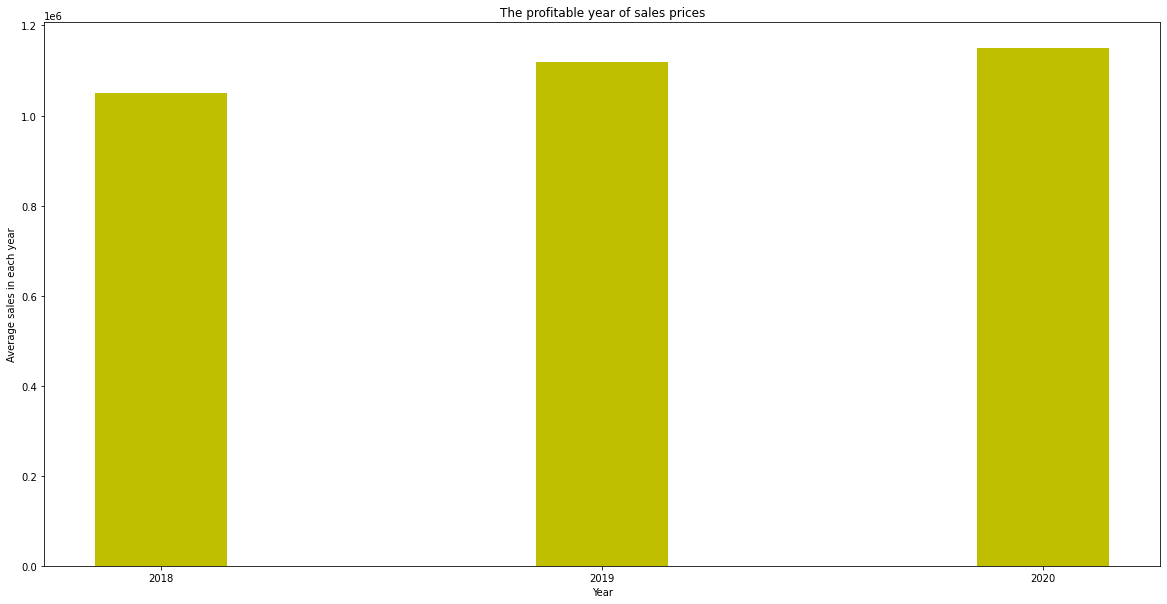

In [208]:
fig = plt.figure(figsize = (20, 10))
 
# creating the bar plot
plt.bar(["2018","2019","2020"], [average_sales_2018_prices.mean(),average_sales_2019_prices.mean(),average_sales_2020_prices.mean()], color ='y',
        width = 0.3)
 
plt.xlabel("Year")
plt.ylabel("Average sales in each year")
plt.title("The profitable year of sales prices")
plt.show()


# **Conclusion According to graph :-**

The most **profitable** year is **2020** although it's the **least** year of number of sales :) .


**Task 3**: Data Exploration via Statistical Test
Raise one question that can be answered by performing hypothesis test. Briefely mention why you think this question would be interesting to whom (who is your audience). Also mention which statistical test you would choose and why.

# **Follow The 3 Questions :- ✋**

# **Question 1 ⚡**
**Is the average sales in 2019 equal average sales 2020 ?**

1- Profitability is a measure of a company’s ability to generate maximum revenue while incurring minimal costs. In the most basic sense, profit goes up as sales increase and/or costs decrease.

2- It 's important for companies to check the rate of progress the Company .

3- Check the sales goals and rate of progress every year in the business by looking for the average sales prices .

4- For most businesses, making a profit is a key business objective .

5- Compare the progress of previous year with current year to see if achieve the goal or not of sales .

-----------------------------------------
**Audiences:-**

1- Compaines .

2- Sales Team .

3- The manager of the company .

4- Marketing Team .



#**The two hypotheses for this particular two samples as follows:-**


Null hypothesis: { **µ sales in 2019 = µ sales in 2020** }

Alternative hypothesis: { **µ sales in 2019 ≠ µ sales in 2020** }

# **1-Calculate the Actual mean and median**

In [231]:
# TODO write code to perform task 3
sales_2019_prices=merged_dataSet[merged_dataSet['SALE DATE']==2019.0]['SALE PRICE']
print("Average Sales in 2019 :- ",sales_2019_prices.mean())
print("Median Sales in 2019 :- ",sales_2019_prices.median())


sales_2020_prices=merged_dataSet[merged_dataSet['SALE DATE']==2020.0]['SALE PRICE']
print("Average Sales in 2020 :- ",sales_2020_prices.mean())
print("Median Sales in 2020 :- ",sales_2020_prices.median())




Average Sales in 2019 :-  1119622.25
Median Sales in 2019 :-  885000.0
Average Sales in 2020 :-  1149713.5
Median Sales in 2020 :-  940000.0


# **2- Apply different ways for check normal Distribuion**

In [227]:
# Way to check normality 
def check_normality(data):
    test_stat_normality, p_value_normality=stats.shapiro(data)
    print("p value:%.4f" % p_value_normality)
    if p_value_normality <0.05:
        print("Reject null hypothesis >> The data is not normally distributed")
    else:
        print("Fail to reject null hypothesis >> The data is normally distributed")


In [229]:
stats.probplot(sales_2019_prices, dist="norm", plot=pylab)
pylab.show() # not normal distribution because of the lines on in the same positon 


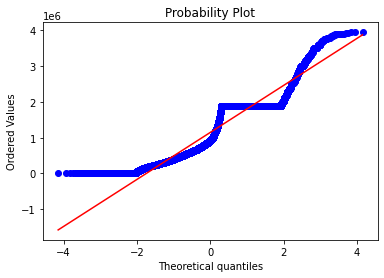

In [230]:
stats.probplot(sales_2020_prices, dist="norm", plot=pylab)
pylab.show() # not normal distribution because of the lines on in the same positon 


In [228]:
check_normality(sales_2019_prices)  # The data is not normally distributed
check_normality(sales_2020_prices)  # The data is not normally distributed

p value:0.0000
Reject null hypothesis >> The data is not normally distributed
p value:0.0000
Reject null hypothesis >> The data is not normally distributed


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


# **Conclusion**
The **sales_2019_prices** and **sales_2020_prices** are not follow the Normal distribution


# **1- Using levene method**
By The data is not normally distributed

In [233]:
stat, pvalue_levene= stats.levene(sales_2019_prices,sales_2020_prices,center='mean')
print("p value:%.4f" % pvalue_levene)
if pvalue_levene <0.05:
    print("Reject null hypothesis ")
else:
    print("Fail to reject null hypothesis ")

p value:0.0001
Reject null hypothesis 


**Conclusion**

**p value: 0.0001**

# **Reject null hypothesis**
## The answer is No accroding to hypothesis test

# **2- Using f_oneway method**
Because The data is not normally distributed

In [235]:
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value

fvalue, pvalue = stats.f_oneway(sales_2019_prices,sales_2020_prices)
print(fvalue, pvalue)
if pvalue <0.05:
    print("Reject null hypothesis ")
else:
    print("Fail to reject null hypothesis ")

42.88598933240481 5.831140795611392e-11
Reject null hypothesis 


**Conclusion**

**p value: 5.831140795611392e-11**

# **Reject null hypothesis**
## The answer is **No** according to hypothesis test .

# **Question 2 ⚡**
**Is the average sales equal 1000,000 $ ?**

1-  This important question for investegator to invest his money or not .

2-  know the progress of the company and the achievement .

3-  In marketing , that used as reference to our customer to gain the trust of our new clients by showing them our progress .

-----------------------------------------
**Audiences:-**

1- Compaines .

2- Sales Team .

3- The manager of the company .

4- Marketing Team .

5- The sities which interested in Investment in building 





#**The two hypotheses for this particular one sample as follows:-**

**H0:** µ = 1000,000 $ ( The mean of sales is 1000,000  )

**HA:** µ ≠ 1000,000 $ ( TThe mean of sales is not 1000,000 )

# **1- Calculate the Actual mean and median**

In [240]:
sales_prices=merged_dataSet['SALE PRICE']
print("Average Sales :- ",sales_prices.mean())
print("Median Sales  :- ",sales_prices.median())

Average Sales :-  1102325.5
Median Sales  :-  865000.0


# **2- Apply different ways for check normal Distribuion**

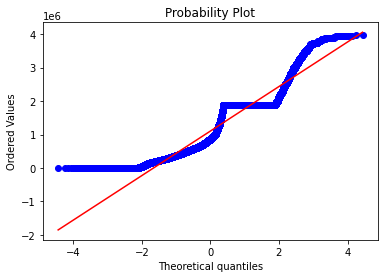

In [238]:
stats.probplot(merged_dataSet["SALE PRICE"], dist="norm", plot=pylab)
pylab.show() # not normal distribution because of the lines on in the same positon 

In [239]:
check_normality(merged_dataSet["SALE PRICE"])  # The data is not normally distributed

p value:0.0000
Reject null hypothesis >> The data is not normally distributed


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


# **Conclusion**
The **sales_prices** is not follow the Normal distribution


# **3- Apply one sample methods as follow ⚡**

# **1- Using wilcoxon**
Because The data is not normally distributed

In [250]:
test,pvalue = stats.wilcoxon(merged_dataSet["SALE PRICE"]-1000000) ##
print("P-value",pvalue)
print("Statics",test)

if(pvalue>0.05): 
  print("We fail to reject the null hypothesis of the test ( Accept H0 )") # Accept 
else :
  print("Reject H0")  # reject

P-value 0.0
Statics 4596275596.0
Reject H0


# **Conclusion**

**Statstic:-**4596275596.0

**p-Value:-** 0.0

**Reject H0**
## The answer is **No** according to hypothesis test .

# **2- Using scikits.bootstrap**

In [251]:
estimatedValue=1000000
CIs = bootstrap.ci(merged_dataSet["SALE PRICE"], statfunction=np.mean,n_samples=100000)  
print(CIs)
min , max = CIs

if (estimatedValue>=min and estimatedValue<=max):
   print("We fail to reject the null hypothesis of the test ( Accept H0 )") # Accept

else :
  print("Reject H0")  # reject   

[1098895.1 1106039.2]
Reject H0


# **Conclusion**

**Reject H0**
## The answer is **No** according to hypothesis test .

# **Question 3 ⚡**

**Is the average sales in  ZIP Code ( 10458 ) equal average sales in ZIP Code( 10456 ) ?**


1- Customers who search for new buliding in specific region .

2- Investigators who search for building to invest his money .

3- The Customers can expect the cost of new building by looking the history of this region .

-----------------------------------------

**Audiences:-**

1- Compaines .

2- Sales Team .

3- The manager of the company .

4- Marketing Team .

5- The sities which interested in Investment in building

6- Customers

# **1-Calculate the Actual mean and median**

In [263]:
ZipCode_10458=merged_dataSet[merged_dataSet['ZIP CODE']==10458]['SALE PRICE']

print("Average Sales in ZipCode_10458 :- ",ZipCode_10458.mean())
print("Median Sales in ZipCode_10458 :- ",ZipCode_10458.median())

ZipCode_10456=merged_dataSet[merged_dataSet['ZIP CODE']==10456]['SALE PRICE']

print("Average Sales in ZipCode_10458 :- ",ZipCode_10456.mean())
print("Median Sales in ZipCode_10458 :- ",ZipCode_10456.median())


Average Sales in ZipCode_10458 :-  867628.4375
Median Sales in ZipCode_10458 :-  625000.0
Average Sales in ZipCode_10458 :-  1030768.5
Median Sales in ZipCode_10458 :-  670000.0


# **2- Apply different ways for check normal Distribuion**

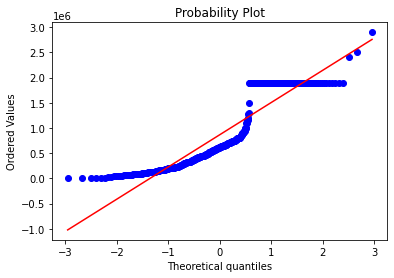

In [264]:
stats.probplot(ZipCode_10458, dist="norm", plot=pylab)
pylab.show() # not normal distribution because of the lines on in the same positon 


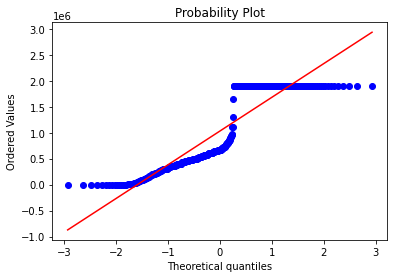

In [265]:
stats.probplot(ZipCode_10456, dist="norm", plot=pylab)
pylab.show() # not normal distribution because of the lines on in the same positon 


In [266]:
check_normality(ZipCode_10458)  # The data is not normally distributed
check_normality(ZipCode_10456)  # The data is not normally distributed

p value:0.0000
Reject null hypothesis >> The data is not normally distributed
p value:0.0000
Reject null hypothesis >> The data is not normally distributed


# **Conclusion**
The **ZipCode_10458** and **ZipCode_10456** are not follow the Normal distribution


#**The two hypotheses for this particular two samples as follows:-**

**H0:** µ ZipCode of 10458 = µ ZipCode of 10456

**HA:** µ ZipCode of 10458 ≠ µ ZipCode of 10456

# **1- Using levene method**
Because The data is not normally distributed

In [268]:
stat, pvalue_levene= stats.levene(ZipCode_10458,ZipCode_10456,center='mean')
print("p value:%.4f" % pvalue_levene)
if pvalue_levene <0.05:
    print("Reject null hypothesis ")
else:
    print("Fail to reject null hypothesis ")

p value:0.0002
Reject null hypothesis 


**Conclusion**

**p value:- 0.0002**

# **Reject null hypothesis**
## The answer is **No** according to hypothesis test .

**Task 4**: Feature Engineering. If we would like to predict the house sale price. Analyze the scale of each attribute and determine which ones you would transfer (e.g., cateogorical features). Discuss how you plan to select important features.

In [210]:
# The scale and handling outlier already discussed in Task 1
# we  Removed all outliers in each  attribute

merged_dataSet # Visulization of part of data

BOROUGH NEIGHBORHOOD     BUILDING CLASS CATEGORY   BLOCK   LOT  \
0           2.0     BATHGATE     01 ONE FAMILY DWELLINGS  2907.0  24.0   
1           2.0     BATHGATE     01 ONE FAMILY DWELLINGS  3030.0  62.0   
2           2.0     BATHGATE     01 ONE FAMILY DWELLINGS  3030.0  62.0   
3           2.0     BATHGATE     01 ONE FAMILY DWELLINGS  3030.0  70.0   
4           2.0     BATHGATE     01 ONE FAMILY DWELLINGS  3039.0  28.0   
...         ...          ...                         ...     ...   ...   
276027      5.0      WOODROW     02 TWO FAMILY DWELLINGS  7355.0  83.0   
276028      5.0      WOODROW     02 TWO FAMILY DWELLINGS  7355.0  84.0   
276029      5.0      WOODROW     02 TWO FAMILY DWELLINGS  7355.0  90.0   
276030      5.0      WOODROW  05 TAX CLASS 1 VACANT LAND  7094.0   1.0   
276031      5.0      WOODROW  05 TAX CLASS 1 VACANT LAND  7094.0   3.0   

                       ADDRESS  ZIP CODE  TOTAL UNITS  LAND SQUARE FEET  \
0             4090 PARK AVENUE   10457.0          1.0            2500.0   
1             4463 PARK AVENUE   10457.0          1.0            1578.0   
2             4463 PARK AVENUE   10457.0          1.0            1578.0   
3             4445 PARK AVENUE   10457.0          1.0            1694.0   
4       2329 WASHINGTON AVENUE   10458.0          1.0            1103.0   
...                        ...       ...          ...               ...   
276027      98 AMBASSADOR LANE   10309.0          2.0            2728.0   
276028     100 AMBASSADOR LANE   10309.0          2.0            2472.0   
276029     117 AMBASSADOR LANE   10309.0          2.0            7200.0   
276030          72 HARRIS LANE   10309.0          0.0            6079.0   
276031          74 HARRIS LANE   10309.0          0.0            5685.0   

        GROSS SQUARE FEET  YEAR BUILT  TAX CLASS AT TIME OF SALE  \
0                  1474.0      1901.0                        1.0   
1                  1470.0      1899.0                        1.0   
2                  1470.0      1899.0                        1.0   
3                  1497.0      1899.0                        1.0   
4                  1290.0      1910.0                        1.0   
...                   ...         ...                        ...   
276027             1980.0      2001.0                        1.0   
276028             1980.0      2001.0                        1.0   
276029             1710.0      2001.0                        1.0   
276030              821.5      1920.0                        1.0   
276031             1916.0      1920.0                        1.0   

       BUILDING CLASS AT TIME OF SALE   SALE PRICE  SALE DATE  
0                                  A1   241500.000     2018.0  
1                                  A1   180000.000     2018.0  
2                                  A1   455000.000     2018.0  
3                                  A1   255000.000     2018.0  
4                                  A1   340000.000     2018.0  
...                               ...          ...        ...  
276027                             B9   537000.000     2020.0  
276028                             B9   525000.000     2020.0  
276029                             B9  1890953.625     2020.0  
276030                             V0   500000.000     2020.0  
276031                             V0   500000.000     2020.0  

[152602 rows x 15 columns]

# **1- Handling Categorical Data**
Using Label encoder for **NEIGHBORHOOD** , **BUILDING CLASS CATEGORY** , **ADDRESS** , **BUILDING CLASS AT TIME OF SALE**

In [211]:
merged_dataSet['NEIGHBORHOOD']= LabelEncoder().fit_transform(merged_dataSet['NEIGHBORHOOD'])
merged_dataSet['BUILDING CLASS CATEGORY']= LabelEncoder().fit_transform(merged_dataSet['BUILDING CLASS CATEGORY'])
merged_dataSet['ADDRESS']= LabelEncoder().fit_transform(merged_dataSet['ADDRESS']) 
merged_dataSet['BUILDING CLASS AT TIME OF SALE']= LabelEncoder().fit_transform(merged_dataSet['BUILDING CLASS AT TIME OF SALE']) 
merged_dataSet

BOROUGH  NEIGHBORHOOD  BUILDING CLASS CATEGORY   BLOCK   LOT  ADDRESS  \
0           2.0             8                        0  2907.0  24.0    90770   
1           2.0             8                        0  3030.0  62.0    95664   
2           2.0             8                        0  3030.0  62.0    95664   
3           2.0             8                        0  3030.0  70.0    95526   
4           2.0             8                        0  3039.0  28.0    59587   
...         ...           ...                      ...     ...   ...      ...   
276027      5.0           239                        1  7355.0  83.0   138687   
276028      5.0           239                        1  7355.0  84.0      582   
276029      5.0           239                        1  7355.0  90.0    12658   
276030      5.0           239                        3  7094.0   1.0   118523   
276031      5.0           239                        3  7094.0   3.0   120073   

        ZIP CODE  TOTAL UNITS  LAND SQUARE FEET  GROSS SQUARE FEET  \
0        10457.0          1.0            2500.0             1474.0   
1        10457.0          1.0            1578.0             1470.0   
2        10457.0          1.0            1578.0             1470.0   
3        10457.0          1.0            1694.0             1497.0   
4        10458.0          1.0            1103.0             1290.0   
...          ...          ...               ...                ...   
276027   10309.0          2.0            2728.0             1980.0   
276028   10309.0          2.0            2472.0             1980.0   
276029   10309.0          2.0            7200.0             1710.0   
276030   10309.0          0.0            6079.0              821.5   
276031   10309.0          0.0            5685.0             1916.0   

        YEAR BUILT  TAX CLASS AT TIME OF SALE  BUILDING CLASS AT TIME OF SALE  \
0           1901.0                        1.0                               1   
1           1899.0                        1.0                               1   
2           1899.0                        1.0                               1   
3           1899.0                        1.0                               1   
4           1910.0                        1.0                               1   
...            ...                        ...                             ...   
276027      2001.0                        1.0                              13   
276028      2001.0                        1.0                              13   
276029      2001.0                        1.0                              13   
276030      1920.0                        1.0                              35   
276031      1920.0                        1.0                              35   

         SALE PRICE  SALE DATE  
0        241500.000     2018.0  
1        180000.000     2018.0  
2        455000.000     2018.0  
3        255000.000     2018.0  
4        340000.000     2018.0  
...             ...        ...  
276027   537000.000     2020.0  
276028   525000.000     2020.0  
276029  1890953.625     2020.0  
276030   500000.000     2020.0  
276031   500000.000     2020.0  

[152602 rows x 15 columns]

# **2- Split DataSet into X and Y**
**X** :- All Features without **'SALE PRICE'**

**Y** :- Predict **SALE PRICE** Column

In [212]:
X=merged_dataSet.loc[:, merged_dataSet.columns != 'SALE PRICE'] # x Features
Y=merged_dataSet["SALE PRICE"] # Y label
print("The Shape of X Feaures",X.shape)
print("The Shape of Y Feature",Y.shape)


The Shape of X Feaures (152602, 14)
The Shape of Y Feature (152602,)


# **3 - Plan for select k Best Features**
Using **pearson's correlation** feature selection For **Regression** Problem

In [213]:
# pearson's correlation feature selection for numeric input and numeric output
# define feature selection
fs = SelectKBest(score_func=f_regression, k='all')
# apply feature selection
X_selected = fs.fit_transform(X, Y)
print(X_selected.shape)
mask=fs.get_support()

(152602, 14)


# **4 -Visualization of each feature with score**

In [214]:

# plot the scores
fig = plt.figure(figsize = (35, 10))
new_features = X.columns[mask]
plt.bar([new_features[i] for i in range(len(fs.scores_))], fs.scores_,width=0.5)
plt.show()

In [215]:
print(new_features)
print(fs.scores_)

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'BLOCK', 'LOT',
       'ADDRESS', 'ZIP CODE', 'TOTAL UNITS', 'LAND SQUARE FEET',
       'GROSS SQUARE FEET', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE',
       'BUILDING CLASS AT TIME OF SALE', 'SALE DATE'],
      dtype='object')
[ 752.35597715  439.1945799  3215.31809866 1193.94711116  407.48335676
    7.18035616  367.60270406 4237.24671913 2929.8223668   251.64291692
 1805.52011557 4624.41376863  349.43352908  496.40805721]


# **5- Drop less important Features according to graph**

In [216]:
X.drop('ADDRESS', axis=1, inplace=True) 
X.drop('GROSS SQUARE FEET', axis=1, inplace=True) 
X.drop('BUILDING CLASS AT TIME OF SALE', axis=1, inplace=True) 
# drop the 3 features from input 

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# **6- Select and train  models**

# **1-RandomForestRegressor**

In [217]:
# here we will search for the best parameters for RandomForest algorithm
# If this takes long time to compute either reduce the number of values for each hyper parameter or use randomized search

# Hyper parameters for random forest:

param_grid = [
    {'n_estimators': [3,10,30], 'max_features':[2,4]},
    {'bootstrap':[False],'n_estimators': [3,10], 'max_features':[2,3,4] }
]


rf_reg = RandomForestRegressor()


grid_search = GridSearchCV(rf_reg, param_grid, cv=5, 

scoring='neg_mean_squared_error', return_train_score=True,)


grid_search.fit(X,Y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4], 'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [218]:
print('neg_mean_squared_error RandomForestRegressor {}'.format(grid_search.best_score_))
print('Best HyperParamters RandomForestRegressor{}'.format(grid_search.best_params_))

neg_mean_squared_error RandomForestRegressor -411893360346.34924
Best HyperParamters RandomForestRegressor{'max_features': 2, 'n_estimators': 30}


# **Results of RandomForestRegressor:-**
**1- neg_mean_squared_error** RandomForestRegressor :- **-413295649320.466**

**2- Best HyperParamters** RandomForestRegressor:- **{'max_features': 2, 'n_estimators': 30}**

# **2- Using LinearRegression model**

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

regr = LinearRegression()
  
regr.fit(X_train, y_train)
print("The score of Training  is :- ",regr.score(X_train, y_train))

print("The score of Testing is :- ",regr.score(X_test, y_test))


The score of Training  is :-  0.11138770823012745
The score of Testing is :-  0.10558377459588864


# **Results of Linear regression:-**

The **Score** of Testing linear regression model :- **0.11085850361808469**

**Task 5**: AutoML

Using Auto-sklearn to explore performance of one state-of-the-art autoML tool on the given data (after your previous preprocessing). Optional: compare with performing autosklearn on raw data.
ref. https://automl.github.io/auto-sklearn/master/examples/20_basic/example_regression.html

# **Build and fit a regressor**

In [220]:
# TODO for Task 5
automl = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=300,
    per_run_time_limit=200,
    tmp_folder='/tmp/autosklearn_regression_example_tmp',
)
automl.fit(X_train, y_train)


[WARNING] [2022-04-24 06:17:48,643:Client-AutoML(1):429d7b54-c396-11ec-82c6-0242ac1c0002] Capping the per_run_time_limit to 149.0 to have time for a least 2 models in each process.
[WARNING] [2022-04-24 06:20:58,485:Client-EnsembleBuilder] No models better than random - using Dummy loss!Number of models besides current dummy model: 1. Number of dummy models: 1


AutoSklearnRegressor(per_run_time_limit=200, time_left_for_this_task=300,
                     tmp_folder='/tmp/autosklearn_regression_example_tmp')

# **View the models found by auto-sklearn**

In [221]:
print(automl.leaderboard())

          rank  ensemble_weight            type      cost  duration
model_id                                                           
5            1              1.0  ard_regression  0.816083  54.50693


# **Print the final ensemble constructed by auto-sklearn**

In [222]:
pprint(automl.show_models(), indent=4)

{   5: {   'cost': 0.816082835836614,
           'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7f917b1d6c10>,
           'ensemble_weight': 1.0,
           'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7f917b1f5310>,
           'model_id': 5,
           'rank': 1,
           'regressor': <autosklearn.pipeline.components.regression.RegressorChoice object at 0x7f917b1f5550>,
           'sklearn_regressor': ARDRegression(alpha_1=4.7044575285722365e-05, alpha_2=0.000629863807127318,
              copy_X=False, lambda_1=7.584067704707025e-10,
              lambda_2=3.923255608410879e-08,
              threshold_lambda=4052.403778957396, tol=0.009359388994186051)}}


# **Get the Score of the final ensemble**

In [223]:
train_predictions = automl.predict(X_train)
print("Train R2 score:", sklearn.metrics.r2_score(y_train, train_predictions))
test_predictions = automl.predict(X_test)
print("Test R2 score:", sklearn.metrics.r2_score(y_test, test_predictions))

Train R2 score: 0.18203533946136896
Test R2 score: 0.17537599853561048


# **Plot the predictions**

In [224]:
plt.scatter(train_predictions, y_train, label="Train samples", c='#d95f02')
plt.scatter(test_predictions, y_test, label="Test samples", c='#7570b3')
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.legend()
plt.plot([30, 400], [30, 400], c='k', zorder=0)
plt.xlim([30, 400])
plt.ylim([30, 400])
plt.tight_layout()
plt.show()

# **Conculsion**
between **Auto Ml** Vs **Linear Regression**

**Noticed** 🥰 

1- **Auto Ml** is powerful tool for searching for the best alogrithm and hyperparameter 💯

2- **Auto Ml** Scored r^2 higher than **Linear Regression** ⚡

In [225]:

# plot the scores
fig = plt.figure(figsize = (10, 10))
plt.bar(["Auto Ml","Linear Regression"], [sklearn.metrics.r2_score(y_test, test_predictions),regr.score(X_test, y_test)],width=0.3)
plt.show()

# **Thank you for your effort for correcting that 💫🥰**